# SaaS Sales Pipeline Optimization
 
### Problem Statement 

CloudNova Solutions (A B2B SaaS company specializing in cloud-based project 
management software) is experiencing **inconsistent sales performance** across regions and reps, suspects **pipeline bottlenecks**, and **lacks data-driven insights** for strategy optimization.

### Objective

The aim is to convert raw opportunity data into reliable insights on where deals are stalled, why they are stalled, as well as what lead source/product tier/competition is relevant and to recommend operational improvements for pipeline velocity, win rate, and forecasting purposes.

The primary objective is to leverage the sales pipeline data to :

- Diagnose pipeline performance by region, rep, and lead source 
- Identify bottlenecks (stages where deals stall or leak)
- Improve forecasting accuracy (win rate, cycle time, stage conversion)
- Provide actionable insights to leadership

### The Data

The dataset is in the form of a csv file.  
It contains historical sales opportunity data for the past 12 months. 

Dataset Columns: 

| Column Name | Description |
|-------------|-------------|
| Opportunity_ID | Unique identifier for each sales opportunity |
| Deal_Name | Name of the deal |
| Account_Name | Name of the prospective client |
| Sales_Rep | Name of the Sales Representative managing the deal |
| Region | Geographic region of the deal (e.g., "North America", "EMEA", "APAC") | 
| Lead_Source | How the lead was acquired (e.g., "Website", "Referral", "Cold Call", "Event", "Partner") |
| Stage | Current stage of the sales pipeline (e.g., "Lead In", "Qualification", "Discovery", "Proposal", "Negotiation", "Closed Won", "Closed Lost") |
| Amount_USD | Estimated value of the deal in USD |
| Close_Date | Projected or actual close date of the deal |
| Created_Date | Date the opportunity was created |
| Days_in_Stage | Number of days the opportunity has been in its current stage |
| Product_Tier | The software tier being discussed (e.g., "Basic", "Pro", "Enterprise") |
| Competitor_Mentioned | Binary (Yes/No) if a competitor was mentioned during the sales process | 
| Loss_Reason | (Applicable only for "Closed Lost" deals) Reason for losing the deal (e.g., "Price", "Features", "Competitor", "No Need", "Timing") |


## SaaS Sales Pipeline Analysis

Import necessary modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Declare the dataset path

In [2]:
file_path = "cloudnova_sales_pipeline.csv"

Load the dataset into dataframe

In [3]:
data = pd.read_csv(file_path)

print("Data loaded successfully !")

Data loaded successfully !


### Data Exploration and Wrangling

#### Data Loading and Initial Inspection

In [4]:
data.shape    # rows and columns

(1005, 14)

In [5]:
data.columns    

Index(['Opportunity_ID', 'Deal_Name', 'Account_Name', 'Sales_Rep', 'Region',
       'Lead_Source', 'Stage', 'Amount_USD', 'Close_Date', 'Created_Date',
       'Days_in_Stage', 'Product_Tier', 'Competitor_Mentioned', 'Loss_Reason'],
      dtype='object')

_**Obs:** No trailing spaces in column names_

In [6]:
data.head()

,Opportunity_ID,Deal_Name,Account_Name,Sales_Rep,Region,Lead_Source,Stage,Amount_USD,Close_Date,Created_Date,Days_in_Stage,Product_Tier,Competitor_Mentioned,Loss_Reason
0,OPP-10926,Deal for ['SynergyCorp'],['SynergyCorp'],Charlie Brown,APAC,Referral,Closed Won,4438.77,29-03-2025,08-11-2024,123,Basic,No,NaN
1,OPP-10630,Deal for ['Prime Ventures'],['Prime Ventures'],Alice Johnson,North America,Partner,Closed Lost,2170.20,11-12-2024,12-08-2024,107,Enterprise,Yes,Budget
2,OPP-10682,Deal for ['Catalyst Group'],['Catalyst Group'],Charlie Brown,North America,Social Media,Closed Won,10254.29,15-11-2024,17-07-2024,102,Enterprise,No,NaN
3,OPP-10514,Deal for ['Catalyst Group'],['Catalyst Group'],Bob Williams,North America,Social Media,Closed Lost,4089.44,17-11-2024,14-10-2024,34,Enterprise,No,No Need
4,OPP-10365,Deal for ['Nexus Enterprises'],['Nexus Enterprises'],Charlie Brown,EMEA,Social Media,Closed Lost,2883.20,30-01-2025,09-11-2024,66,Enterprise,No,Competitor


In [7]:
data.sample(10)

,Opportunity_ID,Deal_Name,Account_Name,Sales_Rep,Region,Lead_Source,Stage,Amount_USD,Close_Date,Created_Date,Days_in_Stage,Product_Tier,Competitor_Mentioned,Loss_Reason
904,OPP-10815,Deal for ['Fusion Innovations'],['Fusion Innovations'],Alice Johnson,EMEA,Event,Closed Won,2662.39,11-07-2025,06-03-2025,108,Basic,No,NaN
480,OPP-10900,Deal for ['Fusion Innovations'],['Fusion Innovations'],Charlie Brown,EMEA,Website,Closed Lost,4407.10,18-04-2025,29-11-2024,122,Basic,No,Competitor
407,OPP-10752,Deal for ['Elite Dynamics'],['Elite Dynamics'],Diana Miller,North America,Cold Call,Closed Lost,2498.30,22-11-2024,30-08-2024,84,Pro,Yes,Budget
970,OPP-10021,Deal for ['BrightSpark'],['BrightSpark'],Charlie Brown,APAC,Cold Call,Closed Lost,10320.79,17-07-2025,07-05-2025,71,Enterprise,Yes,No Need
792,OPP-10472,Deal for ['Elite Dynamics'],['Elite Dynamics'],Bob Williams,APAC,Referral,Closed Lost,12025.35,29-09-2025,17-04-2025,149,Enterprise,No,Competitor
345,OPP-10125,Deal for ['Pioneer Systems'],['Pioneer Systems'],Diana Miller,EMEA,Website,Closed Lost,10934.79,17-04-2025,18-02-2025,52,Enterprise,No,Budget
375,OPP-10173,Deal for ['Nexus Enterprises'],['Nexus Enterprises'],Bob Williams,North America,Website,Closed Lost,1914.37,24-05-2025,27-03-2025,58,Basic,Yes,Timing
819,OPP-10851,Deal for ['Prime Ventures'],['Prime Ventures'],Charlie Brown,APAC,Cold Call,Closed Lost,5581.69,15-03-2025,18-01-2025,56,Pro,No,Features
403,OPP-10650,Deal for ['Veridian Corp'],['Veridian Corp'],Bob Williams,EMEA,Referral,Closed Lost,2159.44,02-09-2024,23-07-2024,29,Pro,Yes,Internal Prioritization
889,OPP-10216,Deal for ['Horizon Digital'],['Horizon Digital'],Charlie Brown,APAC,Referral,Closed Lost,8947.88,03-03-2025,27-10-2024,127,Enterprise,Yes,Competitor


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Opportunity_ID        1005 non-null   object 
 1   Deal_Name             1005 non-null   object 
 2   Account_Name          1005 non-null   object 
 3   Sales_Rep             1005 non-null   object 
 4   Region                1005 non-null   object 
 5   Lead_Source           1005 non-null   object 
 6   Stage                 1005 non-null   object 
 7   Amount_USD            1005 non-null   float64
 8   Close_Date            1005 non-null   object 
 9   Created_Date          1005 non-null   object 
 10  Days_in_Stage         1005 non-null   int64  
 11  Product_Tier          1005 non-null   object 
 12  Competitor_Mentioned  1005 non-null   object 
 13  Loss_Reason           950 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 110.1+ KB


_**Obs:** `Date` is stored as 'object' --> Needs conversion_

In [9]:
data.isnull().sum()

Opportunity_ID           0
Deal_Name                0
Account_Name             0
Sales_Rep                0
Region                   0
Lead_Source              0
Stage                    0
Amount_USD               0
Close_Date               0
Created_Date             0
Days_in_Stage            0
Product_Tier             0
Competitor_Mentioned     0
Loss_Reason             55
dtype: int64

_**Obs:** All columns contain non-null values except `Loss_Reason`._

In [10]:
data.describe() 

,Amount_USD,Days_in_Stage
count,1005.000000,1005.000000
mean,5482.705731,85.216915
std,3632.366465,37.788132
min,518.920000,12.000000
25%,2598.080000,53.000000
50%,4427.070000,86.000000
75%,7809.190000,115.000000
max,17478.080000,183.000000


_**Obs:** No negative outliers_

In [11]:
data['Stage'].unique()

array(['Closed Won', 'Closed Lost'], dtype=object)

_**Obs:** All the deals are closed and there are no open opportunities._

In [12]:
data['Stage'].value_counts()

Stage
Closed Lost    950
Closed Won      55
Name: count, dtype: int64

_**Obs:** 90+ percent of the deals are lost._

In [13]:
data['Loss_Reason'].unique()

array([nan, 'Budget', 'No Need', 'Competitor', 'Internal Prioritization',
       'Timing', 'Price', 'Features'], dtype=object)

In [14]:
data['Loss_Reason'].isnull().sum()

55

_**Obs:** The NaN values correspond to `Closed Won` deals  --> Verify_

In [15]:
data['Competitor_Mentioned'].value_counts()

Competitor_Mentioned
Yes    522
No     483
Name: count, dtype: int64

_**Obs:** More than half of the deals have competitors._

In [16]:
data['Lead_Source'].unique()

array(['Referral', 'Partner', 'Social Media', 'Event', 'Website',
       'Cold Call', 'referral', 'PARTNER', 'SOCIAL MEDIA', 'social media',
       'partner', 'Cold-Call', 'REFERRAL', 'WEBSITE', 'Social-Media',
       'cold call', 'website', 'COLD CALL'], dtype=object)

_**Obs:** Inconsistent names e.g. 'Cold Call', 'Cold-Call', 'cold call' and 'COLD CALL'  --> To be standardized_

In [17]:
data['Region'].unique()

array(['APAC', 'North America', 'EMEA'], dtype=object)

In [18]:
data['Sales_Rep'].unique()

array(['Charlie Brown', 'Alice Johnson', 'Bob Williams', 'Eve Davis',
       'Diana Miller'], dtype=object)

In [19]:
data['Product_Tier'].unique()

array(['Basic', 'Enterprise', 'Pro'], dtype=object)

In [20]:
data['Deal_Name'].unique()

array(["Deal for ['SynergyCorp']", "Deal for ['Prime Ventures']",
       "Deal for ['Catalyst Group']", "Deal for ['Nexus Enterprises']",
       "Deal for ['Elevate Solutions']", "Deal for ['Evergreen Tech']",
       "Deal for ['Velocity Systems']", "Deal for ['Zenith Global']",
       "Deal for ['GlobalTech']", "Deal for ['Apex Solutions']",
       "Deal for ['OmniCorp']", "Deal for ['Veridian Corp']",
       "Deal for ['BrightSpark']", "Deal for ['InnovateCo']",
       "Deal for ['Fusion Innovations']", "Deal for ['Astra Dynamics']",
       "Deal for ['Horizon Digital']", "Deal for ['Pioneer Systems']",
       "Deal for ['Quantum Labs']", "Deal for ['Elite Dynamics']"],
      dtype=object)

In [21]:
data['Account_Name'].unique()

array(["['SynergyCorp']", "['Prime Ventures']", "['Catalyst Group']",
       "['Nexus Enterprises']", "['Elevate Solutions']",
       "['Evergreen Tech']", "['Velocity Systems']", "['Zenith Global']",
       "['GlobalTech']", "['Apex Solutions']", "['OmniCorp']",
       "['Veridian Corp']", "['BrightSpark']", "['InnovateCo']",
       "['Fusion Innovations']", "['Astra Dynamics']",
       "['Horizon Digital']", "['Pioneer Systems']", "['Quantum Labs']",
       "['Elite Dynamics']"], dtype=object)

_**Obs:** Both `Deal_Name` and `Account_Name` ontains bracketed strings --> Clean_

In [22]:
data['Opportunity_ID'].duplicated().sum()

5

_**Obs:** Five rows are duplicates --> to be dropped_

#### Key Observations:

- 1000 opportunities tracked over 12 months (-5 because there are 5 duplicates)
- 5 Sales Reps: Alice Johnson, Bob Williams, Charlie Brown, Diana Miller, Eve Davis
- 3 Regions: North America, EMEA, APAC
- 2 Deal stages: Closed Won, Closed Lost
- 6 Lead Sources: Website, Partner, Referral, Event, Cold Call, Social Media
- 3 Product Tier: Basic, Pro, Enterprise


#### Data Cleaning and Preprocessing

##### Drop duplicate rows

In [23]:
data = data.drop_duplicates()

# verify 
print('Count of duplicate rows:', data.duplicated().sum())

Count of duplicate rows: 0


##### Change data type of `Close_Date` and `Created_Date`

In [24]:
data['Close_Date'] = pd.to_datetime(data['Close_Date'], dayfirst=True, errors = 'coerce')

data['Created_Date'] = pd.to_datetime(data['Created_Date'], dayfirst=True, errors = 'coerce')

In [25]:
#verify

print('Close_Date column data type:', data['Close_Date'].dtype)
print('Created_Date column data type:', data['Created_Date'].dtype)

Close_Date column data type: datetime64[ns]
Created_Date column data type: datetime64[ns]


##### Check for incorrect `Close_Date` or `Created_Date` entries

Close date before Created date

In [26]:
date_err = (data['Close_Date'] < data['Created_Date']).sum()

print("Date anomalies (Close before Created):", date_err)

Date anomalies (Close before Created): 0


In [27]:
data[(data['Close_Date'] < data['Created_Date'])] if date_err >= 1 else print("No Created Date later than Close Date!")

No Created Date later than Close Date!


Dates in the future for Closed deals

In [28]:
today = pd.Timestamp.now()

future_closed = (data['Close_Date'] > today).sum()

print(f"Closed deals with future Close_Date: {future_closed}")

Closed deals with future Close_Date: 0


In [29]:
data[(data['Close_Date'] > today)] if future_closed >= 1 else print("No closed deals in future!")

No closed deals in future!


##### Standardise `Lead_Source` values

In [30]:
data['Lead_Source'] = data['Lead_Source'].str.lower().str.replace('-', ' ').str.title()

In [31]:
#verify

data['Lead_Source'].value_counts()

Lead_Source
Referral        180
Social Media    174
Partner         171
Website         162
Cold Call       159
Event           154
Name: count, dtype: int64

##### Fill missing values in `Loss_Reason` 

Firstly check if the deduction that _all_ the missing values in `Loss_Reason` is for `Closed Won`.

In [32]:
missing_loss_reason = data[(data['Stage']=='Closed Lost') & (data['Loss_Reason'].isnull())]
                           
print("Closed Lost rows with missing Loss_Reason:", missing_loss_reason.shape[0])

Closed Lost rows with missing Loss_Reason: 0


This implies that the missing values are in case of `Closed Won`.

Since there wouldn't be any reason for loss as the deal is won so it is not applicable, so fill them with NaN.

In [33]:
data['Loss_Reason'] = data['Loss_Reason'].fillna('NaN')

In [34]:
#verify

data['Loss_Reason'].value_counts()

Loss_Reason
Competitor                 157
Internal Prioritization    146
Timing                     137
Features                   134
No Need                    132
Price                      123
Budget                     116
NaN                         55
Name: count, dtype: int64

##### Clean `Deal_Name` and `Account_Name`

In [35]:
data['Deal_Name'] = data['Deal_Name'].str.replace("\[|\]|'", '', regex=True)    # use escape(\) before brackets because they have meaning in regex, regex=True so that it doesn't interpret it as string literal

data['Account_Name'] = data['Account_Name'].str.replace("\[|\]|'", '', regex=True)

In [36]:
#verify

print('Deal_Name : \n', data['Deal_Name'].unique())
print('\nAccount_Name : \n', data['Deal_Name'].unique())

Deal_Name : 
 ['Deal for SynergyCorp' 'Deal for Prime Ventures'
 'Deal for Catalyst Group' 'Deal for Nexus Enterprises'
 'Deal for Elevate Solutions' 'Deal for Evergreen Tech'
 'Deal for Velocity Systems' 'Deal for Zenith Global'
 'Deal for GlobalTech' 'Deal for Apex Solutions' 'Deal for OmniCorp'
 'Deal for Veridian Corp' 'Deal for BrightSpark' 'Deal for InnovateCo'
 'Deal for Fusion Innovations' 'Deal for Astra Dynamics'
 'Deal for Horizon Digital' 'Deal for Pioneer Systems'
 'Deal for Quantum Labs' 'Deal for Elite Dynamics']

Account_Name : 
 ['Deal for SynergyCorp' 'Deal for Prime Ventures'
 'Deal for Catalyst Group' 'Deal for Nexus Enterprises'
 'Deal for Elevate Solutions' 'Deal for Evergreen Tech'
 'Deal for Velocity Systems' 'Deal for Zenith Global'
 'Deal for GlobalTech' 'Deal for Apex Solutions' 'Deal for OmniCorp'
 'Deal for Veridian Corp' 'Deal for BrightSpark' 'Deal for InnovateCo'
 'Deal for Fusion Innovations' 'Deal for Astra Dynamics'
 'Deal for Horizon Digital' 'Deal f

##### Create `Sales_Cycle_Days` for all deals

In [37]:
data['Sales_Cycle_Days'] = (data['Close_Date'] - data['Created_Date']).dt.days  

##### Detect Outliers

In [38]:
def outliers(series, k=1.5):
    q1 = series.quantile(0.25)  # value below which 25% of data lie
    q3 = series.quantile(0.75)  # value below which 75% of data lie
    iqr = q3 - q1               # the middle 50% spread of the data
    lower = q1 - k*iqr
    upper = q3 + k*iqr
    return (series < lower) | (series > upper)   # alues below lower or above upper are outliers

In [39]:
print("Amount_USD Outliers:", outliers(data['Amount_USD']).sum())
print("Days_in_Stage Outliers:", outliers(data['Days_in_Stage']).sum())
print("Sales_Cycle_Days:", outliers(data['Sales_Cycle_Days']).sum())

Amount_USD Outliers: 9
Days_in_Stage Outliers: 0
Sales_Cycle_Days: 11


In [40]:
print("Revenue Outliers:")
data[outliers(data['Amount_USD'])] if outliers(data['Amount_USD']).sum() >= 1 else print("No Outliers present in Amounts_USD!")

Revenue Outliers:


,Opportunity_ID,Deal_Name,Account_Name,Sales_Rep,Region,Lead_Source,Stage,Amount_USD,Close_Date,Created_Date,Days_in_Stage,Product_Tier,Competitor_Mentioned,Loss_Reason,Sales_Cycle_Days
34,OPP-10746,Deal for Veridian Corp,Veridian Corp,Alice Johnson,EMEA,Referral,Closed Lost,17478.08,2024-12-03,2024-08-25,100,Enterprise,Yes,Internal Prioritization,100
205,OPP-10652,Deal for Elite Dynamics,Elite Dynamics,Charlie Brown,APAC,Website,Closed Lost,16962.91,2025-07-10,2025-02-23,137,Enterprise,Yes,No Need,137
358,OPP-10300,Deal for BrightSpark,BrightSpark,Bob Williams,APAC,Cold Call,Closed Lost,15995.58,2024-10-11,2024-08-31,41,Enterprise,Yes,Internal Prioritization,41
430,OPP-10439,Deal for Quantum Labs,Quantum Labs,Charlie Brown,APAC,Cold Call,Closed Lost,15948.83,2025-04-02,2025-02-14,42,Enterprise,No,Budget,47
608,OPP-10984,Deal for OmniCorp,OmniCorp,Alice Johnson,North America,Cold Call,Closed Lost,15833.08,2025-04-08,2025-03-07,32,Enterprise,No,Budget,32
666,OPP-10704,Deal for Pioneer Systems,Pioneer Systems,Alice Johnson,APAC,Website,Closed Lost,16296.55,2025-01-11,2024-11-18,35,Enterprise,Yes,Internal Prioritization,54
735,OPP-10415,Deal for Elite Dynamics,Elite Dynamics,Eve Davis,North America,Partner,Closed Lost,15914.77,2025-02-10,2024-09-27,119,Enterprise,No,Budget,136
840,OPP-10642,Deal for Nexus Enterprises,Nexus Enterprises,Diana Miller,North America,Event,Closed Lost,15852.02,2024-12-30,2024-10-04,70,Enterprise,No,Competitor,87
975,OPP-10955,Deal for Quantum Labs,Quantum Labs,Bob Williams,APAC,Social Media,Closed Lost,16872.20,2025-06-04,2025-01-13,131,Enterprise,Yes,Features,142


In [41]:
print("Sales_Cycle_Days Outliers:")
data[outliers(data['Sales_Cycle_Days'])] if outliers(data['Sales_Cycle_Days']).sum() >= 1 else print("No Outliers present in Sales_Cycle_Days!")

Sales_Cycle_Days Outliers:


,Opportunity_ID,Deal_Name,Account_Name,Sales_Rep,Region,Lead_Source,Stage,Amount_USD,Close_Date,Created_Date,Days_in_Stage,Product_Tier,Competitor_Mentioned,Loss_Reason,Sales_Cycle_Days
121,OPP-10921,Deal for SynergyCorp,SynergyCorp,Charlie Brown,EMEA,Partner,Closed Lost,3487.78,2025-06-22,2024-09-07,46,Basic,Yes,No Need,288
127,OPP-10828,Deal for Elevate Solutions,Elevate Solutions,Alice Johnson,APAC,Partner,Closed Lost,3021.67,2025-06-22,2024-08-17,137,Pro,Yes,Features,309
262,OPP-10467,Deal for Prime Ventures,Prime Ventures,Bob Williams,EMEA,Event,Closed Won,12406.68,2025-06-04,2024-07-05,92,Enterprise,Yes,NaN,334
267,OPP-10266,Deal for Catalyst Group,Catalyst Group,Eve Davis,APAC,Referral,Closed Lost,6596.89,2025-06-26,2024-07-19,49,Pro,No,Budget,342
357,OPP-10131,Deal for Elite Dynamics,Elite Dynamics,Eve Davis,North America,Referral,Closed Lost,2011.74,2025-06-07,2024-07-19,102,Basic,No,Budget,323
518,OPP-10222,Deal for Elite Dynamics,Elite Dynamics,Charlie Brown,EMEA,Cold Call,Closed Lost,10004.74,2025-06-22,2024-09-18,135,Pro,Yes,Internal Prioritization,277
567,OPP-10443,Deal for Evergreen Tech,Evergreen Tech,Charlie Brown,APAC,Referral,Closed Lost,4381.17,2025-06-14,2024-08-05,117,Enterprise,No,Timing,313
617,OPP-10716,Deal for Quantum Labs,Quantum Labs,Bob Williams,APAC,Social Media,Closed Lost,7282.19,2025-06-21,2024-10-07,114,Pro,No,Features,257
701,OPP-10297,Deal for Zenith Global,Zenith Global,Alice Johnson,EMEA,Cold Call,Closed Lost,3139.35,2025-06-16,2024-08-31,30,Pro,No,Timing,289
714,OPP-10743,Deal for BrightSpark,BrightSpark,Charlie Brown,APAC,Social Media,Closed Lost,2121.48,2025-06-11,2024-09-25,36,Basic,No,Features,259


Flag the outliers.

Revenue ouliers may be legitimate large deals (also all are Enterprise products which are usually high in deal size).

The Sales Cycle Duration outliers are too large and might be due to possible inefficiencies or delayed decision-making

In [42]:
data['Is_Outlier'] = (outliers(data['Amount_USD']) | outliers(data['Sales_Cycle_Days']))

##### Create Month and Quarter feature

In [43]:
data['Month_Created'] = data['Created_Date'].dt.to_period('M')

data['Month_Closed'] = data['Close_Date'].dt.to_period('M')

data['Quarter_Created'] = data['Created_Date'].dt.to_period('Q')

data['Quarter_Closed'] = data['Close_Date'].dt.to_period('Q')

In [44]:
#verify

data.columns

Index(['Opportunity_ID', 'Deal_Name', 'Account_Name', 'Sales_Rep', 'Region',
       'Lead_Source', 'Stage', 'Amount_USD', 'Close_Date', 'Created_Date',
       'Days_in_Stage', 'Product_Tier', 'Competitor_Mentioned', 'Loss_Reason',
       'Sales_Cycle_Days', 'Is_Outlier', 'Month_Created', 'Month_Closed',
       'Quarter_Created', 'Quarter_Closed'],
      dtype='object')

##### Recheck the data

In [45]:
data.head()

,Opportunity_ID,Deal_Name,Account_Name,Sales_Rep,Region,Lead_Source,Stage,Amount_USD,Close_Date,Created_Date,Days_in_Stage,Product_Tier,Competitor_Mentioned,Loss_Reason,Sales_Cycle_Days,Is_Outlier,Month_Created,Month_Closed,Quarter_Created,Quarter_Closed
0,OPP-10926,Deal for SynergyCorp,SynergyCorp,Charlie Brown,APAC,Referral,Closed Won,4438.77,2025-03-29,2024-11-08,123,Basic,No,NaN,141,False,2024-11,2025-03,2024Q4,2025Q1
1,OPP-10630,Deal for Prime Ventures,Prime Ventures,Alice Johnson,North America,Partner,Closed Lost,2170.20,2024-12-11,2024-08-12,107,Enterprise,Yes,Budget,121,False,2024-08,2024-12,2024Q3,2024Q4
2,OPP-10682,Deal for Catalyst Group,Catalyst Group,Charlie Brown,North America,Social Media,Closed Won,10254.29,2024-11-15,2024-07-17,102,Enterprise,No,NaN,121,False,2024-07,2024-11,2024Q3,2024Q4
3,OPP-10514,Deal for Catalyst Group,Catalyst Group,Bob Williams,North America,Social Media,Closed Lost,4089.44,2024-11-17,2024-10-14,34,Enterprise,No,No Need,34,False,2024-10,2024-11,2024Q4,2024Q4
4,OPP-10365,Deal for Nexus Enterprises,Nexus Enterprises,Charlie Brown,EMEA,Social Media,Closed Lost,2883.20,2025-01-30,2024-11-09,66,Enterprise,No,Competitor,82,False,2024-11,2025-01,2024Q4,2025Q1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1004
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Opportunity_ID        1000 non-null   object        
 1   Deal_Name             1000 non-null   object        
 2   Account_Name          1000 non-null   object        
 3   Sales_Rep             1000 non-null   object        
 4   Region                1000 non-null   object        
 5   Lead_Source           1000 non-null   object        
 6   Stage                 1000 non-null   object        
 7   Amount_USD            1000 non-null   float64       
 8   Close_Date            1000 non-null   datetime64[ns]
 9   Created_Date          1000 non-null   datetime64[ns]
 10  Days_in_Stage         1000 non-null   int64         
 11  Product_Tier          1000 non-null   object        
 12  Competitor_Mentioned  1000 non-null   object        
 13  Loss_Reason           1

In [47]:
data.describe()

,Amount_USD,Close_Date,Created_Date,Days_in_Stage,Sales_Cycle_Days
count,1000.000000,1000,1000,1000.000000,1000.000000
mean,5476.852910,2025-03-05 15:46:04.800000,2024-11-30 01:17:45.600000256,85.432000,95.603000
min,518.920000,2024-07-07 00:00:00,2024-06-01 00:00:00,12.000000,30.000000
25%,2593.830000,2024-12-04 00:00:00,2024-08-28 18:00:00,53.750000,62.000000
50%,4424.005000,2025-03-06 00:00:00,2024-12-01 12:00:00,86.000000,93.000000
75%,7808.530000,2025-06-07 00:00:00,2025-03-02 00:00:00,115.000000,126.000000
max,17478.080000,2025-11-03 00:00:00,2025-05-31 00:00:00,183.000000,342.000000
std,3630.975286,NaN,NaN,37.721748,43.116684


#### Save the cleaned dataset

In [48]:
#data.to_csv("cleaned_cloudnova_sales_pipeline.csv", index=False)

print("File saved successfully !")

File saved successfully !


##### Actions taken

- Deleted duplicate rows (-5)
- Changed data type of `Created_Date` and `Close_Date` columns
- Checked date anomalies
- Standardised `Lead_Source` values
- Filled missing `Loss_Reason` with NaN
- Cleaned `Deal_Name` and `Account_Name`
- Detected and flagged outliers
- Created column `Sales_Cycle_Days`
- Created columns `Month_Created`, `Month_Closed`, `Quarter_Created` and `Quarter Closed`
- Saved the cleaned dataset

### Analysis & Insights Generation

#### Pipeline Health Analysis and Performance Deep Dive

##### Key pipeline metrics 

Pipeline Status Check

In [49]:
print("Total Deals:", len(data))

Total Deals: 1000


In [50]:
closed_deals = data[data['Stage'].isin(['Closed Won', 'Closed Lost'])]

# or can just use data['Stage'] since all the deals are closed as verified earlier

print("Total Closed Deals:", len(closed_deals))

Total Closed Deals: 1000


In [51]:
deals_won = data[data['Stage'] == 'Closed Won']
print("Deals Won:", len(deals_won))

Deals Won: 55


In [52]:
deals_lost = data[data['Stage'] == 'Closed Lost']
print("Deals Lost:", len(deals_lost))

Deals Lost: 945


Pipeline Value

In [53]:
pipeline_value = data['Amount_USD'].sum()

print("Total Pipeline Value (All Closed Deals):", pipeline_value)

Total Pipeline Value (All Closed Deals): 5476852.91


_**Obs:** Total pipeline value is concentrated but conversion is poor_

Number of open opportunities

In [54]:
open_deals = len(data) - len(closed_deals)

print("Total open opportunities:", open_deals)

Total open opportunities: 0


Average Deal Size

In [55]:
print('Average Revenue (All Closed Deals):', data['Amount_USD'].mean().round(2))

print('\nAverage Revenue (Won Deals):', deals_won['Amount_USD'].mean().round(2))

print('\nAverage Revenue (Lost Deals):', deals_lost['Amount_USD'].mean().round(2))

Average Revenue (All Closed Deals): 5476.85

Average Revenue (Won Deals): 5132.74

Average Revenue (Lost Deals): 5496.88


_**Obs:**_ 

- _Average deal size for a 'Close Won' deal is lesser than that of 'Close Lost' deal_
- _The company is losing the larger, more valuable deals_

Sales Cycle Length: Average time to close a deal

In [56]:
avg_cycle_all = data['Sales_Cycle_Days'].median().round(2)

print("Average Sales Cycle Length (All Closed Deals):", avg_cycle_all)

print("\nAverage Sales Cycle Length (Won Deals):", deals_won['Sales_Cycle_Days'].median().round(2))

print("\nAverage Sales Cycle Length (Lost Deals):", deals_lost['Sales_Cycle_Days'].median().round(2))

Average Sales Cycle Length (All Closed Deals): 93.0

Average Sales Cycle Length (Won Deals): 137.0

Average Sales Cycle Length (Lost Deals): 92.0


(Using median instead of mean coz outliers impact mean but median will not have that much impact on it)

_**Obs:**_

- _Average time to close a 'Close Won' deal is significantly higher than that of 'Close Lost' deal --> Deals that are won take longer to close than deals that are lost_
- _Lost deals are closing quicker, maybe early disqualification or decisive competitor losses_
- _Resource inefficiency, for every win there needs to be high effort_

Win Rate: Percentage of deals won out of total closed deals

In [57]:
win_rate = len(deals_won) / (len(data))

win_rate = win_rate * 100

print(f"Overall Win Rate: {win_rate} %")

Overall Win Rate: 5.5 %


_**Obs:**_

- _The Win Rate is a very **low** (94.5% loss)._
- _Poor Sales Efficiency_
- _There may be gaps in lead qualification, representative performance or competition handling._

KPI Summary

In [58]:
print("KPI Summary:\n")
print("Toatal Deals:", len(data))
print("Total open opportunities:", open_deals)
print("Deals Won:", len(deals_won))
print("Deals Lost:", len(deals_lost))
print("Total Pipeline Value (All Closed Deals):", pipeline_value)
print('Average Deal Size (All Closed Deals):', data['Amount_USD'].mean().round(2))
print('Median Deal Size (All Closed Deals):', data['Amount_USD'].median().round(2))
print("Average Sales Cycle Length (All Closed Deals):", data['Sales_Cycle_Days'].median().round(2))
print(f"Overall Win Rate: {win_rate * 100} %")

KPI Summary:

Toatal Deals: 1000
Total open opportunities: 0
Deals Won: 55
Deals Lost: 945
Total Pipeline Value (All Closed Deals): 5476852.91
Average Deal Size (All Closed Deals): 5476.85
Median Deal Size (All Closed Deals): 4424.0
Average Sales Cycle Length (All Closed Deals): 93.0
Overall Win Rate: 550.0 %


##### Key Observations

- Win Rate is critically low (5.5%), very inefficienct and wasted sales effort

- Lost deals tend to be higher in value — the team is losing larger opportunities, suggesting pricing or competitive gaps.

- Won deals take almost 1.5× longer to close (137 days vs 92 days), implying heavy effort and slow revenue conversion.

- Pipeline value is high but poorly converted, have potential.

- Median values are more reliable for performance tracking.

##### Pipeline distribution

Deals Won vs Lost

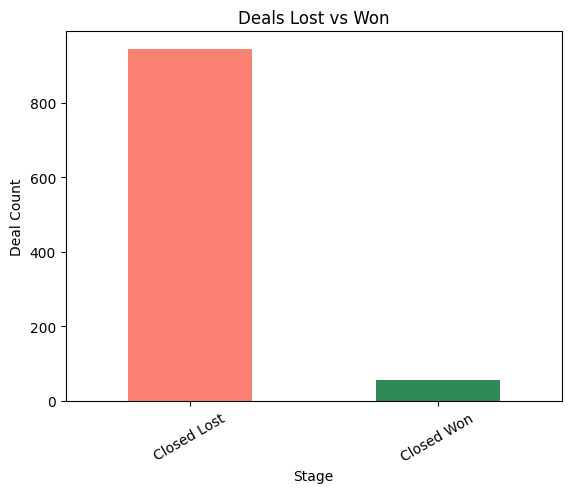

In [59]:
data['Stage'].value_counts().plot(kind='bar', color=['salmon', 'seagreen'])
plt.title('Deals Lost vs Won')
plt.xlabel('Stage')
plt.ylabel('Deal Count')
plt.xticks(rotation=30)
plt.show()

##### Deal Value

Top 10 Highest Value Deals

In [60]:
top_deals = data.sort_values('Amount_USD', ascending=False).head(10)
top_deals[['Opportunity_ID', 'Deal_Name', 'Account_Name', 'Sales_Rep', 'Region', 'Amount_USD', 'Stage', 'Product_Tier']]

,Opportunity_ID,Deal_Name,Account_Name,Sales_Rep,Region,Amount_USD,Stage,Product_Tier
34,OPP-10746,Deal for Veridian Corp,Veridian Corp,Alice Johnson,EMEA,17478.08,Closed Lost,Enterprise
205,OPP-10652,Deal for Elite Dynamics,Elite Dynamics,Charlie Brown,APAC,16962.91,Closed Lost,Enterprise
975,OPP-10955,Deal for Quantum Labs,Quantum Labs,Bob Williams,APAC,16872.20,Closed Lost,Enterprise
666,OPP-10704,Deal for Pioneer Systems,Pioneer Systems,Alice Johnson,APAC,16296.55,Closed Lost,Enterprise
358,OPP-10300,Deal for BrightSpark,BrightSpark,Bob Williams,APAC,15995.58,Closed Lost,Enterprise
430,OPP-10439,Deal for Quantum Labs,Quantum Labs,Charlie Brown,APAC,15948.83,Closed Lost,Enterprise
735,OPP-10415,Deal for Elite Dynamics,Elite Dynamics,Eve Davis,North America,15914.77,Closed Lost,Enterprise
840,OPP-10642,Deal for Nexus Enterprises,Nexus Enterprises,Diana Miller,North America,15852.02,Closed Lost,Enterprise
608,OPP-10984,Deal for OmniCorp,OmniCorp,Alice Johnson,North America,15833.08,Closed Lost,Enterprise
934,OPP-10564,Deal for Velocity Systems,Velocity Systems,Diana Miller,North America,15570.83,Closed Lost,Enterprise


In [61]:
top_deals_sum = top_deals.groupby('Account_Name')['Amount_USD'].agg(['count', 'sum'])

print("Top Overall Deals:")
top_deals_sum.sort_values('sum', ascending=False)

Top Overall Deals:


,count,sum
Account_Name,,
Elite Dynamics,2,32877.68
Quantum Labs,2,32821.03
Veridian Corp,1,17478.08
Pioneer Systems,1,16296.55
BrightSpark,1,15995.58
Nexus Enterprises,1,15852.02
OmniCorp,1,15833.08
Velocity Systems,1,15570.83


_**Obs:**_ 

- _All of the top deals are lost_
- _`Elite Dynamics` and `Quantum Labs` lead the overall deals_
- _The top regions are `North America` and `APAC`_
- _All of them are `Enterprise` products_
- _`Alice Johnson` handles 30% of them_

Top 10 Highest Value Deals that are Won

In [62]:
top_deals_won = deals_won.sort_values('Amount_USD', ascending=False).head(10)
top_deals_won[['Opportunity_ID', 'Deal_Name', 'Account_Name', 'Sales_Rep', 'Region', 'Amount_USD', 'Stage', 'Product_Tier']]

,Opportunity_ID,Deal_Name,Account_Name,Sales_Rep,Region,Amount_USD,Stage,Product_Tier
752,OPP-10810,Deal for Catalyst Group,Catalyst Group,Eve Davis,North America,15371.46,Closed Won,Enterprise
348,OPP-10554,Deal for Apex Solutions,Apex Solutions,Diana Miller,EMEA,14167.91,Closed Won,Enterprise
504,OPP-10395,Deal for Elite Dynamics,Elite Dynamics,Alice Johnson,North America,13894.98,Closed Won,Enterprise
541,OPP-10446,Deal for Elevate Solutions,Elevate Solutions,Eve Davis,North America,12407.75,Closed Won,Enterprise
262,OPP-10467,Deal for Prime Ventures,Prime Ventures,Bob Williams,EMEA,12406.68,Closed Won,Enterprise
948,OPP-10484,Deal for Elevate Solutions,Elevate Solutions,Charlie Brown,EMEA,11456.98,Closed Won,Enterprise
773,OPP-10233,Deal for SynergyCorp,SynergyCorp,Bob Williams,APAC,11359.46,Closed Won,Enterprise
815,OPP-10170,Deal for OmniCorp,OmniCorp,Alice Johnson,North America,10397.58,Closed Won,Enterprise
2,OPP-10682,Deal for Catalyst Group,Catalyst Group,Charlie Brown,North America,10254.29,Closed Won,Enterprise
263,OPP-10097,Deal for Zenith Global,Zenith Global,Alice Johnson,APAC,7638.96,Closed Won,Pro


In [63]:
top_deals_won_sum = top_deals_won.groupby('Account_Name')['Amount_USD'].agg(['count', 'sum'])

print("Top Won Deals:")
top_deals_won_sum.sort_values('sum', ascending=False)

Top Won Deals:


,count,sum
Account_Name,,
Catalyst Group,2,25625.75
Elevate Solutions,2,23864.73
Apex Solutions,1,14167.91
Elite Dynamics,1,13894.98
Prime Ventures,1,12406.68
SynergyCorp,1,11359.46
OmniCorp,1,10397.58
Zenith Global,1,7638.96


_**Obs:**_

- _The most revenue comes from `Catalyst Group` and `Elevate Solutions` both handled by `Eve Davis` and both are `Enterprise` products_
- _Almost all of them are `Enterprise` products_
- _The top regions are `North America` and `EMEA`_
- _`Alice Johnson` handles 30% of these_

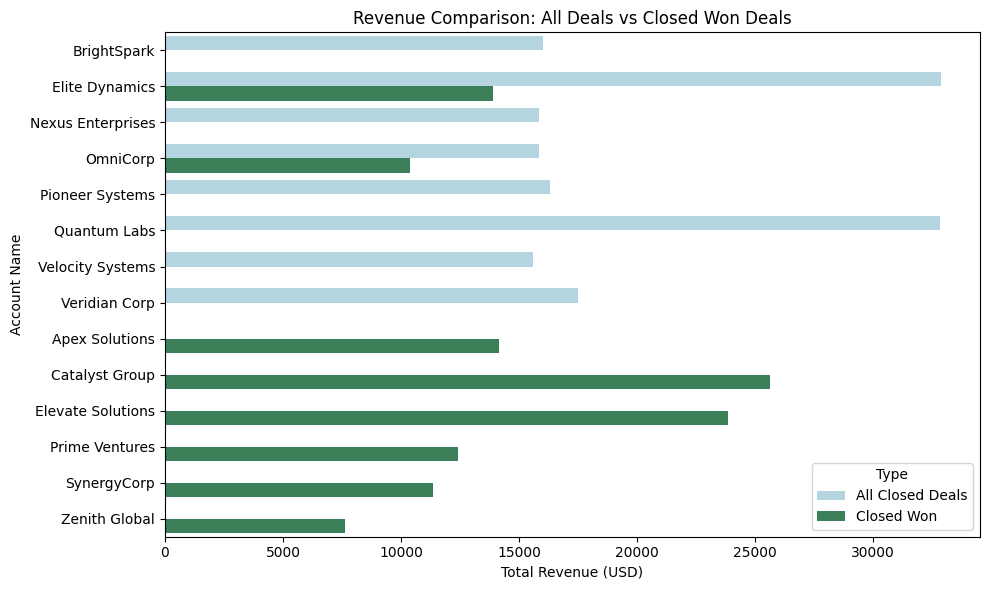

In [64]:
# Prepare a combined dataframe
top_deals_sum['Type'] = 'All Closed Deals'
top_deals_won_sum['Type'] = 'Closed Won'

top_deals_combined = pd.concat([top_deals_sum, top_deals_won_sum]).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_deals_combined, x='sum',y='Account_Name', hue='Type', palette=['lightblue', 'seagreen'])
plt.title('Revenue Comparison: All Deals vs Closed Won Deals')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Account Name')
plt.tight_layout()
plt.show()

_**Obs:**_

- _Most of the top deals are lost_
- _Elite Dynamics, OmniCorp are key accounts to retain and expand_
- _`Catalyst Group` and `Elevate Solutions` have good relationship and or product fit_
- _Losing bigger opportunities_

##### Deal Size Segmentation

In [65]:
data['Deal_Segment'] = pd.cut(data['Amount_USD'], bins=[0, 3000, 7000, 12000, float('inf')], labels=['Small (<$3K)', 'Medium ($3-7K)', 'Large ($7-12K)', 'Enterprise (>$12K)'])

segment_analysis = data.groupby('Deal_Segment').agg(
    Total_Deals=('Opportunity_ID', 'count'),
    Deals_Won=('Stage', lambda x: (x == 'Closed Won').sum()),
    Avg_Cycle_Days=('Sales_Cycle_Days', 'median')
)

segment_analysis['Win_Rate_%'] = (segment_analysis['Deals_Won'] / segment_analysis['Total_Deals'] * 100)

print("Distribution of Deal Amounts:")
segment_analysis.round(2).sort_values('Win_Rate_%', ascending=False)

Distribution of Deal Amounts:


C:\Users\shubh\AppData\Local\Temp\ipykernel_28528\447605493.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = data.groupby('Deal_Segment').agg(


,Total_Deals,Deals_Won,Avg_Cycle_Days,Win_Rate_%
Deal_Segment,,,,
Enterprise (>$12K),61,5,103.0,8.20
Medium ($3-7K),387,25,96.0,6.46
Small (<$3K),306,19,90.0,6.21
Large ($7-12K),246,6,96.0,2.44


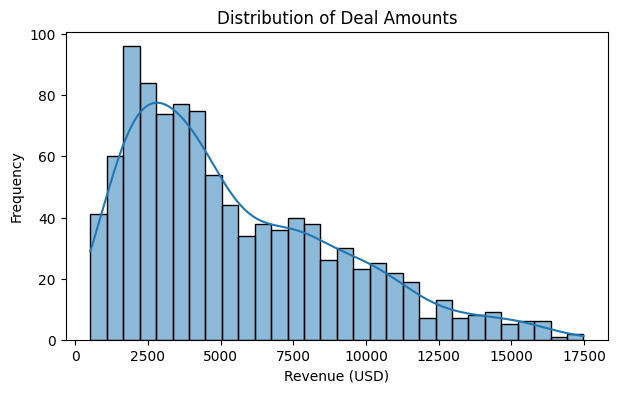

In [66]:
plt.figure(figsize=(7,4))
sns.histplot(data['Amount_USD'], bins=30, kde=True)
plt.title("Distribution of Deal Amounts")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

In [67]:
print(f"Best win rate segment: {segment_analysis['Win_Rate_%'].idxmax()}")
print(f"Longest cycle segment: {segment_analysis['Avg_Cycle_Days'].idxmax()}")

Best win rate segment: Enterprise (>$12K)
Longest cycle segment: Enterprise (>$12K)


##### Cycle time distribution

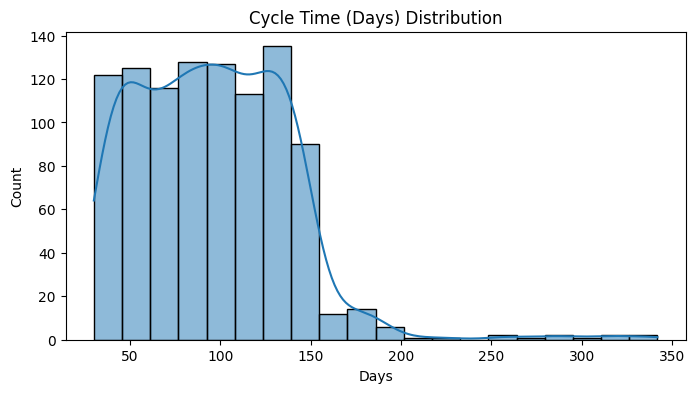

In [68]:
plt.figure(figsize=(8,4))
sns.histplot(data['Sales_Cycle_Days'].dropna(), bins=20, kde=True)
plt.title('Cycle Time (Days) Distribution')
plt.xlabel("Days")
plt.show()

_**Obs:** Sales Cycle Duration have a broad distribution_

##### Outliers

In [69]:
outliers = data[data['Is_Outlier'] == True]

outliers[['Amount_USD', 'Sales_Cycle_Days']].describe()

,Amount_USD,Sales_Cycle_Days
count,20.00000,20.000000
mean,10553.57900,199.650000
std,5984.25987,112.232032
min,2011.74000,32.000000
25%,4157.82250,96.750000
50%,11205.71000,241.500000
75%,15960.51750,294.000000
max,17478.08000,342.000000


In [70]:
outliers[['Account_Name', 'Amount_USD', 'Sales_Rep', 'Lead_Source', 'Product_Tier', 'Region', 'Stage', 'Sales_Cycle_Days']].sort_values('Amount_USD')

,Account_Name,Amount_USD,Sales_Rep,Lead_Source,Product_Tier,Region,Stage,Sales_Cycle_Days
357,Elite Dynamics,2011.74,Eve Davis,Referral,Basic,North America,Closed Lost,323
714,BrightSpark,2121.48,Charlie Brown,Social Media,Basic,APAC,Closed Lost,259
127,Elevate Solutions,3021.67,Alice Johnson,Partner,Pro,APAC,Closed Lost,309
701,Zenith Global,3139.35,Alice Johnson,Cold Call,Pro,EMEA,Closed Lost,289
121,SynergyCorp,3487.78,Charlie Brown,Partner,Basic,EMEA,Closed Lost,288
567,Evergreen Tech,4381.17,Charlie Brown,Referral,Enterprise,APAC,Closed Lost,313
267,Catalyst Group,6596.89,Eve Davis,Referral,Pro,APAC,Closed Lost,342
617,Quantum Labs,7282.19,Bob Williams,Social Media,Pro,APAC,Closed Lost,257
810,Evergreen Tech,9463.87,Diana Miller,Event,Enterprise,EMEA,Closed Lost,226
518,Elite Dynamics,10004.74,Charlie Brown,Cold Call,Pro,EMEA,Closed Lost,277


**Obs:** 

- _Most anomalies came from high-value deals_
- _`Charlie Brown` and `Alice Johnson` appear most frequently_
- _Most are in `APAC` region_
- _Average Revenue and Average Cycle Days are too high_
- _Very Inefficient_

##### Sales Representative 

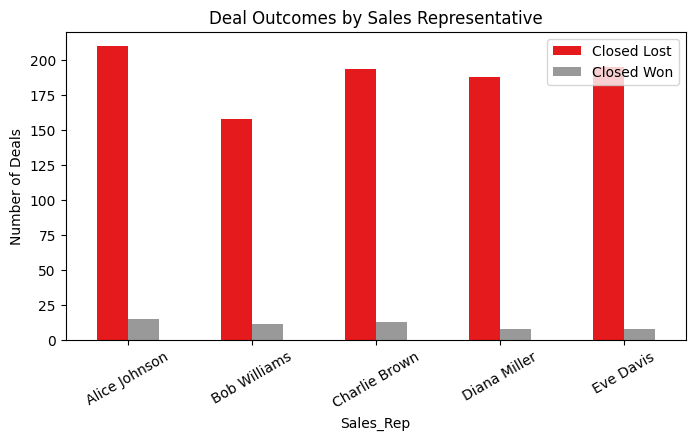

In [71]:
rep_stage_counts = data.groupby(['Sales_Rep', 'Stage']).size().unstack(fill_value=0)

rep_stage_counts.plot(kind='bar', stacked=False, figsize=(8,4), colormap='Set1')
plt.title('Deal Outcomes by Sales Representative')
plt.ylabel('Number of Deals')
plt.xticks(rotation=30)
plt.legend(loc='best')
plt.show()

_**Obs:** `Alice` still has the most deals and `Bob` the least_

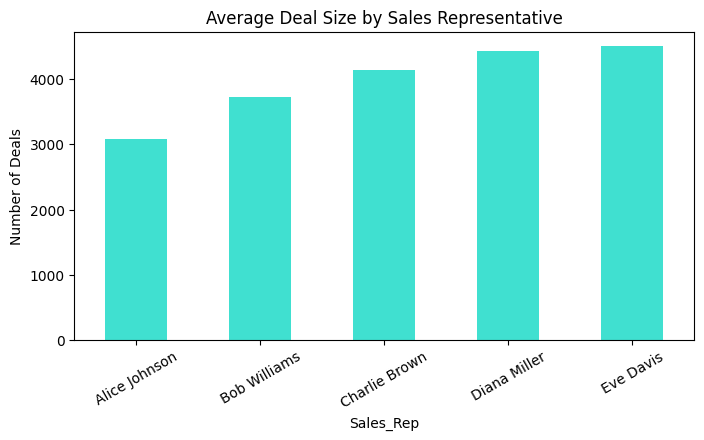

In [72]:
rep_avg_won_val = deals_won.groupby('Sales_Rep')['Amount_USD'].median()

rep_avg_won_val.plot(kind='bar', figsize=(8,4), color='turquoise')
plt.title('Average Deal Size by Sales Representative')
plt.ylabel('Number of Deals')
plt.xticks(rotation=30)
plt.show()

_**Obs:** `Eve` have the highest avg revenue_

In [73]:
rep_sales_cycle = data.groupby(['Sales_Rep', 'Stage'])['Sales_Cycle_Days'].median().unstack()

In [74]:
rep_performance = (
    data.groupby('Sales_Rep')
    .agg(
        Total_Deals=('Opportunity_ID', 'count'),
        Deals_Won=('Stage', lambda x: (x == 'Closed Won').sum()),
        Total_Revenue_USD=('Amount_USD', 'sum'),
        Average_Revenue_USD=('Amount_USD', 'median'),
    )
)

rep_performance['Avg_Won_Revenue_USD'] = rep_avg_won_val
rep_performance['Win_Rate_%'] = ((rep_performance['Deals_Won'] / rep_performance['Total_Deals']) * 100)
rep_performance['Avg_Cycle_Days_(Won Deals)'] = rep_sales_cycle['Closed Won']
rep_performance['Avg_Cycle_Days_(Lost Deals)'] = rep_sales_cycle['Closed Lost']

print("Sales Representative Performance Summary:\n")
rep_performance.round(2).sort_values('Win_Rate_%', ascending=False)

Sales Representative Performance Summary:



,Total_Deals,Deals_Won,Total_Revenue_USD,Average_Revenue_USD,Avg_Won_Revenue_USD,Win_Rate_%,Avg_Cycle_Days_(Won Deals),Avg_Cycle_Days_(Lost Deals)
Sales_Rep,,,,,,,,
Alice Johnson,225,15,1242794.01,4555.15,3087.77,6.67,128.0,90.0
Bob Williams,169,11,839168.07,3928.24,3734.69,6.51,150.0,91.5
Charlie Brown,207,13,1187099.90,4631.50,4147.64,6.28,94.0,97.0
Diana Miller,196,8,1082485.53,4481.92,4434.62,4.08,167.5,91.5
Eve Davis,203,8,1125305.40,4299.80,4502.16,3.94,129.5,92.0


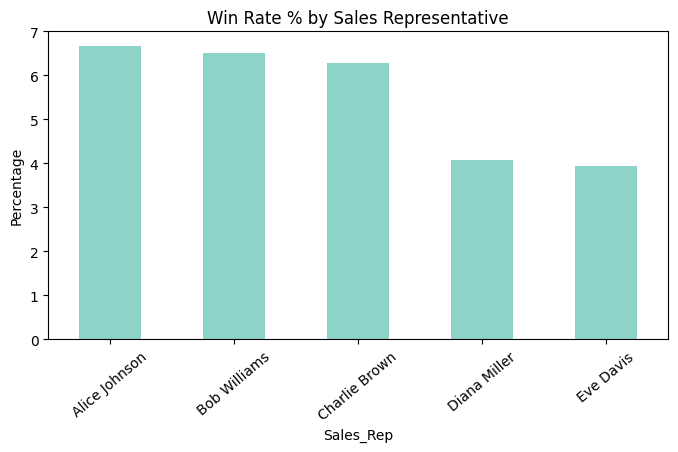

In [75]:
rep_performance['Win_Rate_%'].plot(kind='bar', stacked=True, figsize=(8,4), colormap='Set3')
plt.title('Win Rate % by Sales Representative')
plt.ylabel('Percentage')
plt.xticks(rotation=40)
plt.show()

_**Obs:** `Alice` is the most efficient closely followed by `Bob`, while `Eve` and `Diana` has a significantly lower win rate_

_**Obs:**_

- _Alice leads in both Win Rate and Revenue and is the top performer_
- _Eve has low Win Rate but cracks larger deals_
- _Charlie has the shortest sales cycle while Diana has the longest_
- _High-value Enterprise deals are concentrated among a few reps_
- _They may be wasting efforts on unqualified deals_
- _Conversion and Deal value differ by rep_
- _Some rep mostly have higher-value deals_
- _Share winning tactics among reps_

##### Region

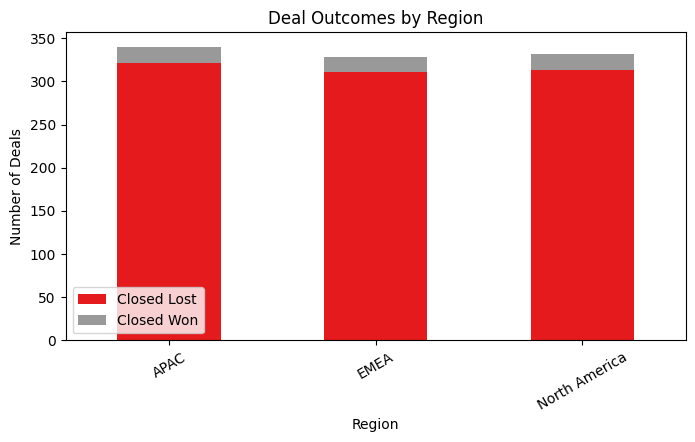

In [76]:
region_stage_counts = data.groupby(['Region', 'Stage']).size().unstack(fill_value=0)

region_stage_counts.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Set1')
plt.title('Deal Outcomes by Region')
plt.ylabel('Number of Deals')
plt.xticks(rotation=30)
plt.legend(loc='best')
plt.show()

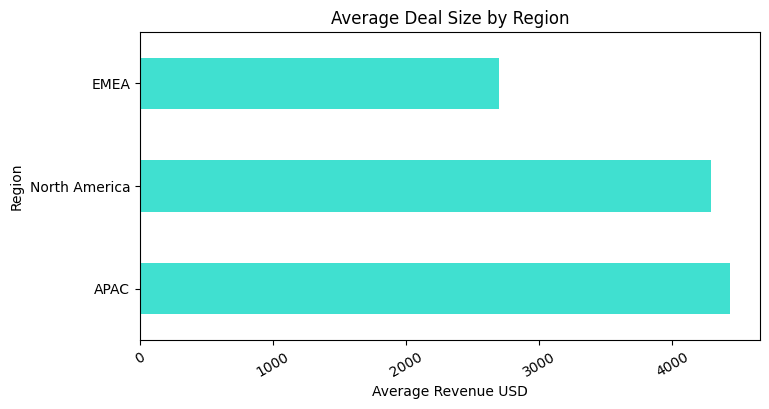

In [77]:
region_avg_won_val = deals_won.groupby('Region')['Amount_USD'].median()

region_avg_won_val.sort_values(ascending=False).plot(kind='barh', figsize=(8,4), color='turquoise')
plt.title('Average Deal Size by Region')
plt.xlabel('Average Revenue USD')
plt.xticks(rotation=30)
plt.show()

_**Obs:** `APAC` and `North America` has the highest avg revenue_

In [78]:
region_sales_cycle = data.groupby(['Region', 'Stage'])['Sales_Cycle_Days'].median().unstack()

In [79]:
region_performance = (
    data.groupby('Region')
    .agg(
        Total_Deals=('Opportunity_ID', 'count'),
        Deals_Won=('Stage', lambda x: (x == 'Closed Won').sum()),
        Total_Deal_Value=('Amount_USD', 'sum'),
        Average_Revenue_USD=('Amount_USD', 'mean'),
    )
)

region_performance['Average_Won_Revenue_USD'] = region_avg_won_val
region_performance['Win_Rate_%'] = ((region_performance['Deals_Won'] / region_performance['Total_Deals']) * 100)
region_performance['Avg_Cycle_Days_(Won Deals)'] = region_sales_cycle['Closed Won']
region_performance['Avg_Cycle_Days_(Lost Deals)'] = region_sales_cycle['Closed Lost']

print("Region Performance Summary:\n")
region_performance.round(2).sort_values('Win_Rate_%', ascending=False)

Region Performance Summary:



,Total_Deals,Deals_Won,Total_Deal_Value,Average_Revenue_USD,Average_Won_Revenue_USD,Win_Rate_%,Avg_Cycle_Days_(Won Deals),Avg_Cycle_Days_(Lost Deals)
Region,,,,,,,,
North America,332,19,1821654.09,5486.91,4293.12,5.72,142.0,92.0
APAC,340,19,1936495.62,5695.58,4438.77,5.59,122.0,91.0
EMEA,328,17,1718703.20,5239.95,2701.37,5.18,150.0,93.0


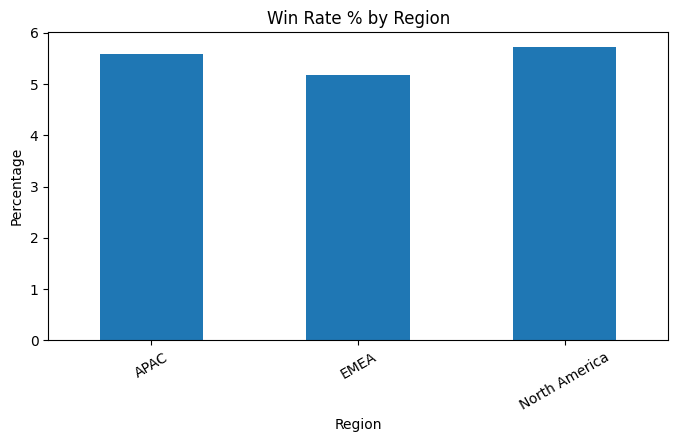

In [80]:
region_performance['Win_Rate_%'].plot(kind='bar', stacked=True,  figsize=(8,4))
plt.title('Win Rate % by Region')
plt.ylabel('Percentage')
plt.xticks(rotation=30)
plt.show()

_**Obs:**_

- _Win Rate is uniformly low across all regions, the problem doesn't seem to be region-specific_
- _APAC generates highest deal value but has low Win Rate_
- _North America is relatively better in both Revenue and Win Rate_
- _Sales Cycle Duration differ by region; APAC region deals takes the shortest time while EMEA deals the longest_
- _EMEA underperforms as it has both slower cycle and lower value --> improve efficiency_
- _Can focus Enterprise products in North America and APAC_

Best and worst performers

In [81]:
print(f"Best Performing Region: {region_performance['Win_Rate_%'].idxmax()} ({region_performance['Win_Rate_%'].max():.2f}%)")
print(f"Lowest Performing Region: {region_performance['Win_Rate_%'].idxmin()} ({region_performance['Win_Rate_%'].min():.2f}%)")

Best Performing Region: North America (5.72%)
Lowest Performing Region: EMEA (5.18%)


##### Product Tier

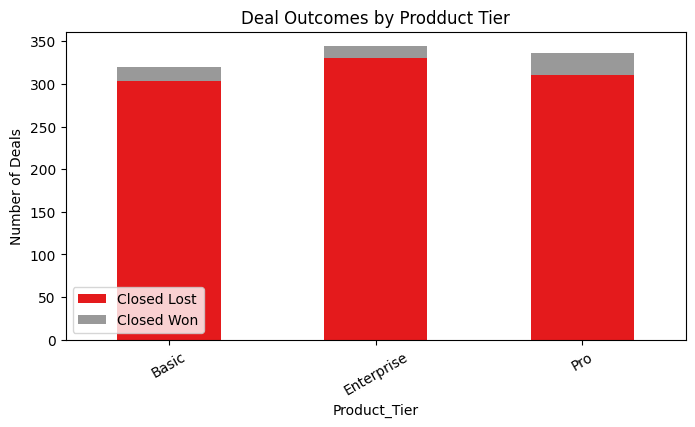

In [82]:
prod_stage_counts = data.groupby(['Product_Tier', 'Stage']).size().unstack()

prod_stage_counts.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Set1')

plt.title('Deal Outcomes by Prodduct Tier')
plt.ylabel('Number of Deals')
plt.xticks(rotation=30)
plt.legend(loc='best')
plt.show()

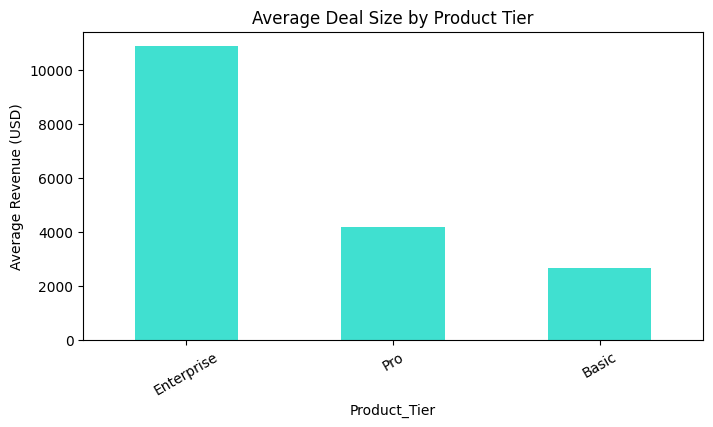

In [83]:
prod_avg_won_val = deals_won.groupby('Product_Tier')['Amount_USD'].median()

prod_avg_won_val.sort_values(ascending=False).plot(kind='bar', figsize=(8,4), color='turquoise')
plt.title('Average Deal Size by Product Tier')
plt.ylabel('Average Revenue (USD)')
plt.xticks(rotation=30)
plt.show()

_**Obs:** The Enterprise deals are the biggest ones while the Baisc ones are of smaller scale_

In [84]:
prod_sales_cycle = data.groupby(['Product_Tier', 'Stage'])['Sales_Cycle_Days'].median().unstack()

In [85]:
prod_performance = (
    data.groupby('Product_Tier')
    .agg(
        Total_Deals=('Opportunity_ID', 'count'),
        Deals_Won=('Stage', lambda x: (x == 'Closed Won').sum()),
        Total_Deal_Value=('Amount_USD', 'sum'),
        Average_Revenue_USD=('Amount_USD', 'mean'),
    )
)

prod_performance['Avg_Won_Revenue_USD'] = prod_avg_won_val
prod_performance['Win_Rate_%'] = ((prod_performance['Deals_Won'] / prod_performance['Total_Deals']) * 100)
prod_performance['Avg_Cycle_Days_(Won Deals)'] = prod_sales_cycle['Closed Won']
prod_performance['Avg_Cycle_Days_(Lost Deals)'] = prod_sales_cycle['Closed Lost']

print("Product Tier Performance Summary:\n")
prod_performance.round(2).sort_values('Win_Rate_%', ascending=False)

Product Tier Performance Summary:



,Total_Deals,Deals_Won,Total_Deal_Value,Average_Revenue_USD,Avg_Won_Revenue_USD,Win_Rate_%,Avg_Cycle_Days_(Won Deals),Avg_Cycle_Days_(Lost Deals)
Product_Tier,,,,,,,,
Pro,336,25,1801681.78,5362.15,4176.29,7.44,140.0,91.0
Basic,320,16,905870.72,2830.85,2651.86,5.00,158.5,90.0
Enterprise,344,14,2769300.41,8050.29,10878.52,4.07,108.5,96.5


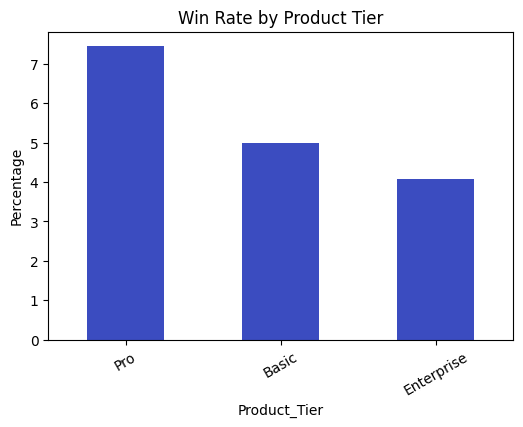

In [86]:
prod_performance['Win_Rate_%'].sort_values(ascending=False).plot(kind='bar', stacked=False, figsize=(6,4), colormap='coolwarm')
plt.title('Win Rate by Product Tier')
plt.ylabel('Percentage')
plt.xticks(rotation=30)
plt.show()

_**Obs:**_

- _Product Tier `Pro` has the highest Win Rate and is the most balanced one_
- _The high-value `Enterprise` deals have the lowest Win Rate, reinforcing the 'losing big deals' observation._  
- _`Enterprise` deals are getting closed a lot quicker (Lost deals were also getting closed quickly) --> invest_
- _`Basic` tier products struggles with both Revenue and Win Rate --> improve_
- _Product performance skews toward mid-tier success (Pro) but with missed revenue potential in Enterprise_

Also,
- _Higher-tier products may have fewer but larger wins_
- _Lower-tier ones might have higher volume but lower margins_

In [87]:
print(f"Best Performing Product Tier: {prod_performance['Win_Rate_%'].idxmax()} ({prod_performance['Win_Rate_%'].max():.2f}%)")
print(f"Lowest Performing Product Tier: {prod_performance['Win_Rate_%'].idxmin()} ({prod_performance['Win_Rate_%'].min():.2f}%)")

Best Performing Product Tier: Pro (7.44%)
Lowest Performing Product Tier: Enterprise (4.07%)


##### Product v Region

Deal distribution by Product Tier and Region

In [88]:
prod_region_counts = data.groupby(['Product_Tier', 'Region']).size().unstack().fillna(0)

print("Deal Count by Product Tier × Region:")
prod_region_counts

Deal Count by Product Tier × Region:


Region,APAC,EMEA,North America
Product_Tier,,,
Basic,106,115,99
Enterprise,117,108,119
Pro,117,105,114


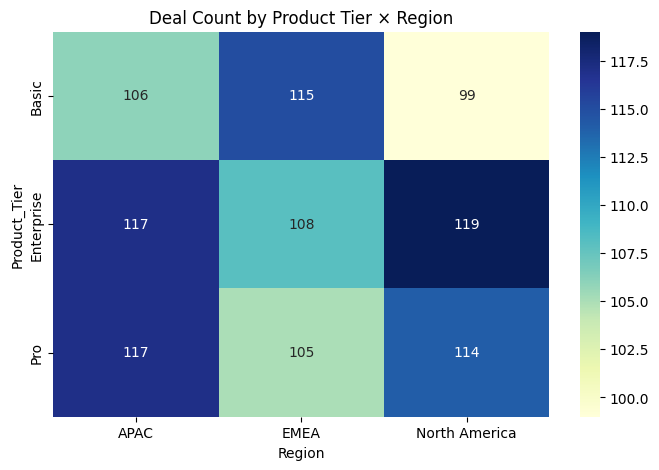

In [89]:
plt.figure(figsize=(8, 5))
sns.heatmap(prod_region_counts, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Deal Count by Product Tier × Region')
plt.show()

Average deal value by Product Tier × Region

In [90]:
prod_region_avg = data.groupby(['Product_Tier', 'Region'])['Amount_USD'].median().unstack().round(2)

print("Average Revenue (USD) by Product Tier × Region:")
prod_region_avg

Average Revenue (USD) by Product Tier × Region:


Region,APAC,EMEA,North America
Product_Tier,,,
Basic,2353.86,2960.61,3101.32
Enterprise,8521.54,7807.34,8099.88
Pro,6026.27,4711.85,5100.63


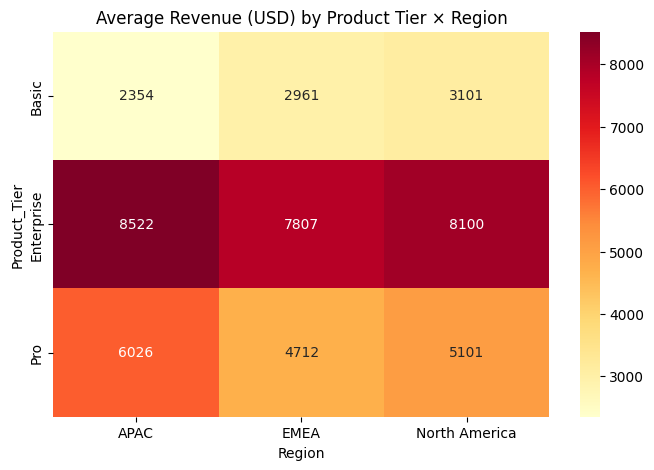

In [91]:
plt.figure(figsize=(8, 5))
sns.heatmap(prod_region_avg, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Revenue (USD) by Product Tier × Region')
plt.show()

Closed Won rate by Product Tier × Region

In [92]:
prod_region_won_avg = data.groupby(['Product_Tier', 'Region'])['Stage'].apply(lambda x: (x == 'Closed Won').mean() * 100).unstack().round(2)

print("Closed Won Rate (%) by Product Tier × Region:")
prod_region_won_avg

Closed Won Rate (%) by Product Tier × Region:


Region,APAC,EMEA,North America
Product_Tier,,,
Basic,5.66,3.48,6.06
Enterprise,1.71,4.63,5.88
Pro,9.40,7.62,5.26


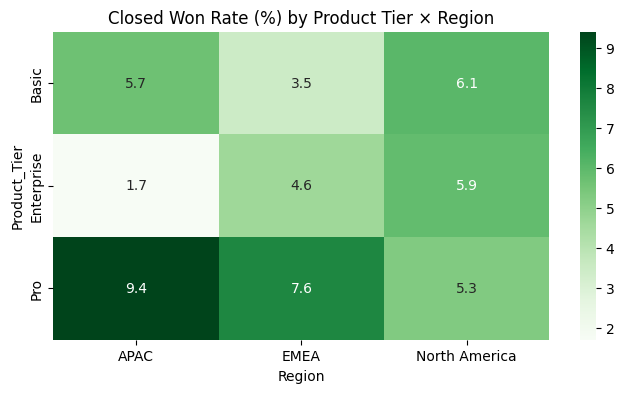

In [93]:
plt.figure(figsize=(8, 4))
sns.heatmap(prod_region_won_avg, annot=True, fmt='.1f', cmap='Greens')
plt.title('Closed Won Rate (%) by Product Tier × Region')
plt.show()

In [94]:
print("Key Insights:\n")
print(f"Highest average deal value: {prod_region_avg.stack().idxmax()[0]} in {prod_region_avg.stack().idxmax()[1]}")
print(f"Most deals closed: {prod_region_counts.stack().idxmax()[0]} in {prod_region_counts.stack().idxmax()[1]}")
print(f"Highest Closed Won rate: {prod_region_won_avg.stack().idxmax()[0]} in {prod_region_won_avg.stack().idxmax()[1]}")

Key Insights:

Highest average deal value: Enterprise in APAC
Most deals closed: Enterprise in North America
Highest Closed Won rate: Pro in APAC


_**Obs:**_

- _Enterprise–APAC has the highest average deal value→ pricing power and enterprise demand are strongest here_
- _Enterprise–North America has the most deals, showing broad pipeline coverage despite moderate win rates_
- _Pro–APAC has the highest Win Rate, indicating strong regional fit and competitive positioning_
- _EMEA underperforms in both win rates and deal sizes → investigate regional pricing or value perception issues_

##### Lead Sources

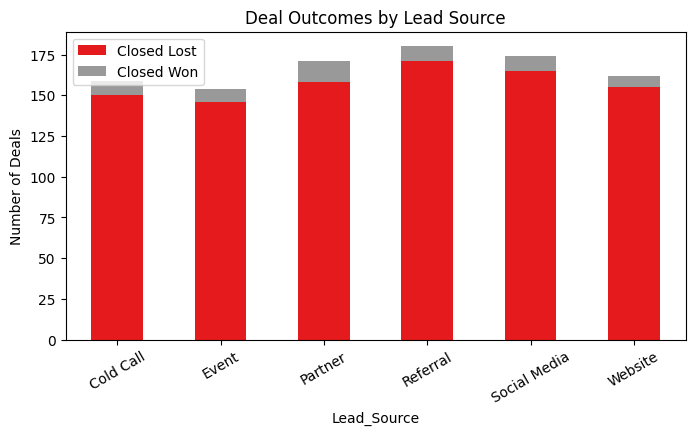

In [95]:
lead_stage_counts = data.groupby(['Lead_Source', 'Stage']).size().unstack()

lead_stage_counts.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Set1')

plt.title('Deal Outcomes by Lead Source')
plt.ylabel('Number of Deals')
plt.xticks(rotation=30)
plt.legend(loc='best')
plt.show()

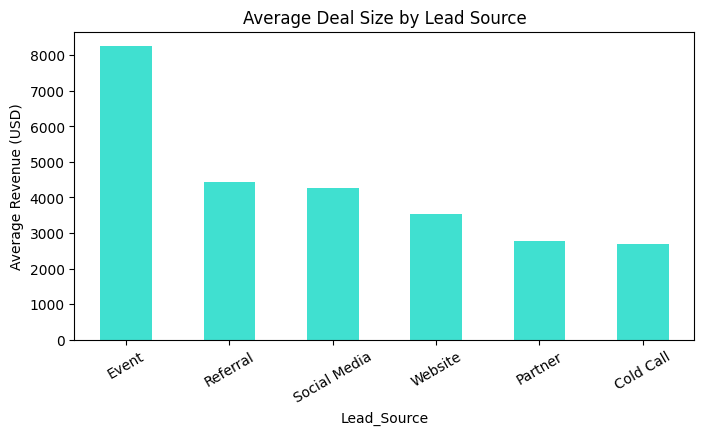

In [96]:
lead_avg_won_val = deals_won.groupby('Lead_Source')['Amount_USD'].median()

lead_avg_won_val.sort_values(ascending=False).plot(kind='bar', figsize=(8,4), color='turquoise')
plt.title('Average Deal Size by Lead Source')
plt.ylabel('Average Revenue (USD)')
plt.xticks(rotation=30)
plt.show()

In [97]:
lead_sales_cycle = data.groupby(['Lead_Source', 'Stage'])['Sales_Cycle_Days'].median().unstack()

In [98]:
lead_performance = (
    data.groupby('Lead_Source')
    .agg(
        Total_Deals=('Opportunity_ID', 'count'),
        Deals_Won=('Stage', lambda x: (x == 'Closed Won').sum()),
        Total_Deal_Value=('Amount_USD', 'sum'),
        Average_Revenue_USD=('Amount_USD', 'mean'),
    )
)

lead_performance['Avg_Won_Revenue_USD'] = lead_avg_won_val
lead_performance['Win_Rate_%'] = ((lead_performance['Deals_Won'] / lead_performance['Total_Deals']) * 100)
lead_performance['Avg_Cycle_Days_(Won Deals)'] = lead_sales_cycle['Closed Won']
lead_performance['Avg_Cycle_Days_(Lost Deals)'] = lead_sales_cycle['Closed Lost']

print("Lead Source Performance Summary:\n")
lead_performance.round(2).sort_values('Win_Rate_%', ascending=False)

Lead Source Performance Summary:



,Total_Deals,Deals_Won,Total_Deal_Value,Average_Revenue_USD,Avg_Won_Revenue_USD,Win_Rate_%,Avg_Cycle_Days_(Won Deals),Avg_Cycle_Days_(Lost Deals)
Lead_Source,,,,,,,,
Partner,171,13,841662.98,4922.01,2784.02,7.60,120.0,90.5
Cold Call,159,9,919986.27,5786.08,2701.37,5.66,179.0,87.0
Event,154,8,855266.61,5553.68,8250.19,5.19,147.0,91.0
Social Media,174,9,947919.03,5447.81,4257.09,5.17,159.0,96.0
Referral,180,9,1023308.20,5685.05,4438.77,5.00,137.0,94.0
Website,162,7,888709.82,5485.86,3531.34,4.32,105.0,96.0


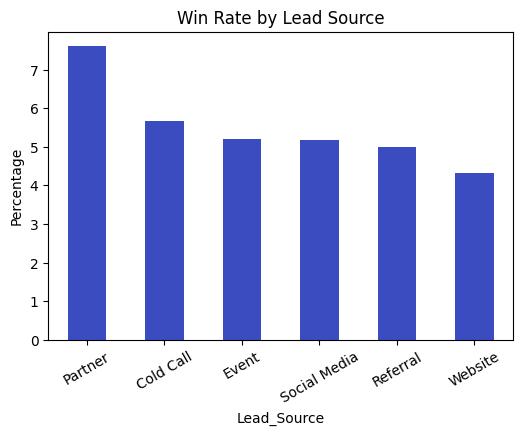

In [99]:
lead_performance['Win_Rate_%'].sort_values(ascending=False).plot(kind='bar', stacked=False, figsize=(6,4), colormap='coolwarm')
plt.title('Win Rate by Lead Source')
plt.ylabel('Percentage')
plt.xticks(rotation=30)
plt.show()

Best and worst performers

In [100]:
print(f"Most Effective Lead Source: {lead_performance['Win_Rate_%'].idxmax()} ({lead_performance['Win_Rate_%'].max():.2f}% win rate)")
print(f"Highest Avg Deal Size: {lead_performance['Average_Revenue_USD'].idxmax()} (${lead_performance['Average_Revenue_USD'].max():,.2f})")
print(f"\nLeast Effective Lead Source: {lead_performance['Win_Rate_%'].idxmin()} ({lead_performance['Win_Rate_%'].min():.2f}% win rate)")

Most Effective Lead Source: Partner (7.60% win rate)
Highest Avg Deal Size: Cold Call ($5,786.08)

Least Effective Lead Source: Website (4.32% win rate)


_**Obs:**_

- _Partner leads have the highest Win Rate —> strongest channel; scale partnerships and co-marketing_
- _Website leads have the lowest win rate → check form quality, inbound qualification, or response time_
- _Event leads have the highest revenue but low volume → nurture event prospects more effectively_
- _Cold Calls generate decent pipeline but low Win Rate — revisit targeting or sales scripts_
- _Social Media & Referral bring consistent deals but average returns — strengthen follow-up cadence_


 _Overall: prioritize Partner and Event channels for quality, while optimizing Cold Call and Website for efficiency_

##### Region x Product Tier x Lead Source

In [101]:
multi_dim = data.groupby(['Region', 'Product_Tier', 'Lead_Source']).agg(
    Total_Deals=('Opportunity_ID', 'count'),
    Won_Deals=('Stage', lambda x: (x == 'Closed Won').sum())
)
multi_dim['Win_Rate_%'] = (multi_dim['Won_Deals'] / multi_dim['Total_Deals'] * 100)

multi_dim = multi_dim.round(2).sort_values('Win_Rate_%', ascending=False)

print("Top Deals by Region × Product Tier × Lead Source")
multi_dim.head(10)

Top Deals by Region × Product Tier × Lead Source


Total_Deals  Won_Deals  Win_Rate_%
Region        Product_Tier Lead_Source                                     
APAC          Pro          Social Media           18          4       22.22
EMEA          Enterprise   Event                  14          3       21.43
North America Basic        Cold Call              17          3       17.65
EMEA          Pro          Partner                18          3       16.67
APAC          Basic        Referral               14          2       14.29
EMEA          Basic        Cold Call              16          2       12.50
              Pro          Cold Call              16          2       12.50
APAC          Pro          Partner                16          2       12.50
              Basic        Website                17          2       11.76
North America Basic        Partner                17          2       11.76

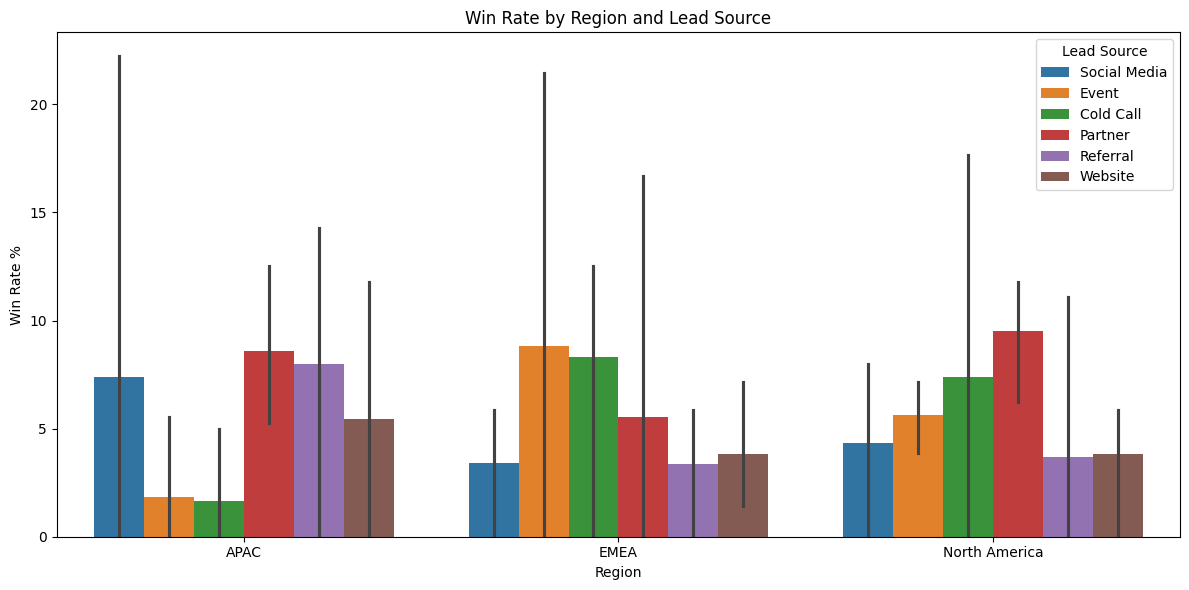

In [102]:
plt.figure(figsize=(12,6))
sns.barplot(data=multi_dim, x='Region', y='Win_Rate_%', hue='Lead_Source')
plt.title('Win Rate by Region and Lead Source')
plt.ylabel('Win Rate %')
plt.xticks(rotation=0)
plt.legend(title='Lead Source', loc='best')
plt.tight_layout()
plt.show()


_**Obs:**_

- _APAC – Pro – Social Media leads performance with the highest win rate (22.2%), indicating strong digital engagement effectiveness in this segment_
- _EMEA – Enterprise – Event channel performs well (21.4% win rate), suggesting that in-person events effectively convert large clients_
- _North America – Basic – Cold Call also shows decent conversion (17.6%) despite being a traditional lead source — a good opportunity to enhance outbound strategy_
- _Partner channel consistently contributes across regions and tiers (e.g., EMEA Pro, APAC Pro), reflecting stable partnership-driven wins_
- _Website and Referral channels show lower win rates (~11–14%), implying potential to improve lead quality or nurture strategy for inbound leads_

##### Loss Reason

In [103]:
loss_reasons = (
    deals_lost.groupby('Loss_Reason')
    .agg(
        Total_Deals=('Opportunity_ID', 'count'),
        Total_Amount_Lost=('Amount_USD', 'sum'),
        Average_Amount_Lost=('Amount_USD', 'median'),
        Avg_Cycle_Days=('Sales_Cycle_Days', 'median')
    )
)

loss_reasons['Loss%'] = (loss_reasons['Total_Deals'] / loss_reasons['Total_Deals'].sum()) * 100

print("Loss Reasons Performance Summary:\n")
loss_reasons.round(2).sort_values('Loss%', ascending=False)

Loss Reasons Performance Summary:



,Total_Deals,Total_Amount_Lost,Average_Amount_Lost,Avg_Cycle_Days,Loss%
Loss_Reason,,,,,
Competitor,157,879282.79,4855.00,91.0,16.61
Internal Prioritization,146,828614.41,4414.17,89.0,15.45
Timing,137,718180.28,4090.69,99.0,14.50
Features,134,774994.85,4658.38,92.5,14.18
No Need,132,715123.97,4417.88,92.0,13.97
Price,123,639186.08,4420.94,88.0,13.02
Budget,116,639169.72,4831.77,98.5,12.28


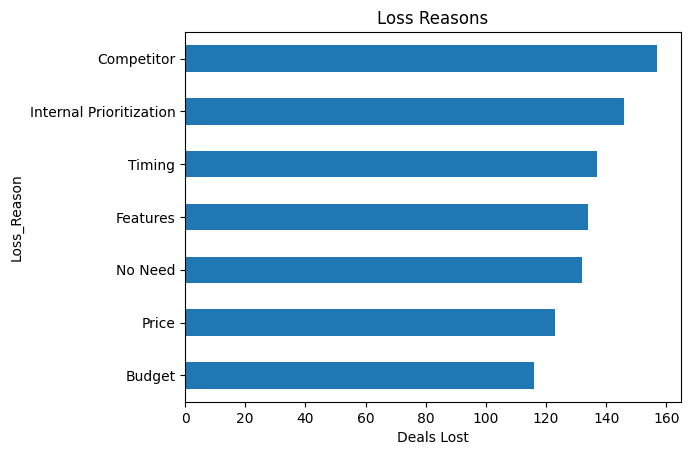

In [104]:
loss_reasons['Total_Deals'].sort_values().plot(kind='barh')
plt.title('Loss Reasons')
plt.xlabel('Deals Lost')
plt.show()

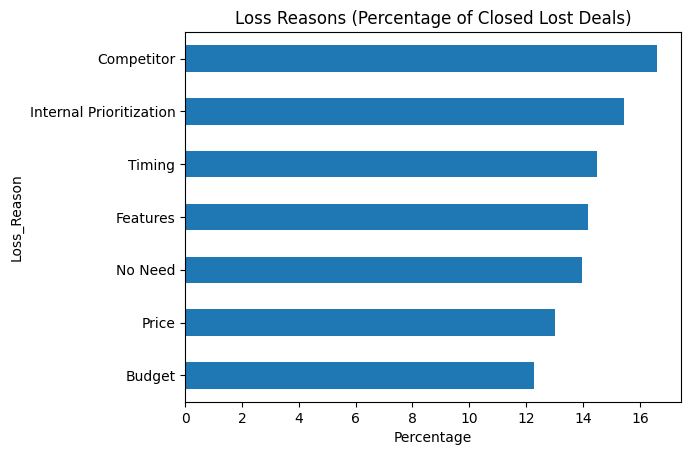

In [105]:
loss_reasons['Loss%'].sort_values().plot(kind='barh')
plt.title('Loss Reasons (Percentage of Closed Lost Deals)')
plt.xlabel('Percentage')
plt.show()

In [106]:
print(f"Most Critical Reason: {loss_reasons['Loss%'].idxmax()} ({loss_reasons['Loss%'].max():.2f}% win rate)")
print(f"Least Critical Reason: {loss_reasons['Loss%'].idxmin()} (${loss_reasons['Loss%'].min():,.2f})")

Most Critical Reason: Competitor (16.61% win rate)
Least Critical Reason: Budget ($12.28)


_**Obs:**_

- _Competitor and Internal Prioritization are the most common loss drivers, together accounting for over 32% of total deal losses_
- _Competitor losses cost the most overall (≈ $879K), highlighting strong external competition_
- _Deals lost due to Timing and Budget had the longest average cycles (≈99 days) —-> delayed decisions or extended negotiations that don’t close_

##### Loss Reasons x Product Tier

In [107]:
loss_by_prod = deals_lost.groupby('Product_Tier')['Loss_Reason'].value_counts().unstack()

print("Loss Reasons by Product Tier:")
loss_by_prod

Loss Reasons by Product Tier:


Loss_Reason,Budget,Competitor,Features,Internal Prioritization,No Need,Price,Timing
Product_Tier,,,,,,,
Basic,38,39,41,62,41,41,42
Enterprise,35,62,46,51,43,47,46
Pro,43,56,47,33,48,35,49


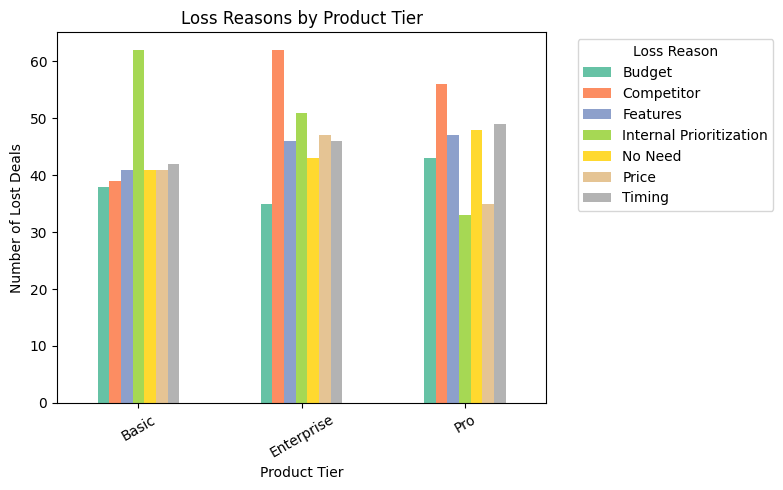

In [108]:
loss_by_prod.plot(kind='bar', stacked=False, figsize=(8,5), colormap='Set2')
plt.title('Loss Reasons by Product Tier')
plt.xlabel('Product Tier')
plt.ylabel('Number of Lost Deals')
plt.xticks(rotation=30)
plt.legend(title='Loss Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [109]:
# Normalize the loss reasons within each Product Tier (i.e., for all lost Basic deals, what % were lost to Price?)
loss_by_prod_norm = deals_lost.groupby('Product_Tier')['Loss_Reason'].value_counts(normalize=True).mul(100).unstack()
loss_by_prod_norm = loss_by_prod_norm.T # Transpose for better visualization

print("Loss Reason Breakdown by Product Tier (% of Lost Deals per Tier):")
loss_by_prod_norm.round(2)

Loss Reason Breakdown by Product Tier (% of Lost Deals per Tier):


Product_Tier,Basic,Enterprise,Pro
Loss_Reason,,,
Budget,12.50,10.61,13.83
Competitor,12.83,18.79,18.01
Features,13.49,13.94,15.11
Internal Prioritization,20.39,15.45,10.61
No Need,13.49,13.03,15.43
Price,13.49,14.24,11.25
Timing,13.82,13.94,15.76


_**Obs:**_

- _Basic Tier has major loss from Internal Prioritization (20.4%)_
- _Enterprise Tier has Competitor as most dominating loss reason —-> strong competition in high-value enterprise markets_
- _For Pro Tier Competitor and Timing are key issues_

##### Loss Reasons x Region

In [110]:
loss_by_region = deals_lost.groupby('Region')['Loss_Reason'].value_counts().unstack()

print("Loss Reasons by Region:")
loss_by_region

Loss Reasons by Region:


Loss_Reason,Budget,Competitor,Features,Internal Prioritization,No Need,Price,Timing
Region,,,,,,,
APAC,41,63,46,50,40,41,40
EMEA,38,49,47,49,40,37,51
North America,37,45,41,47,52,45,46


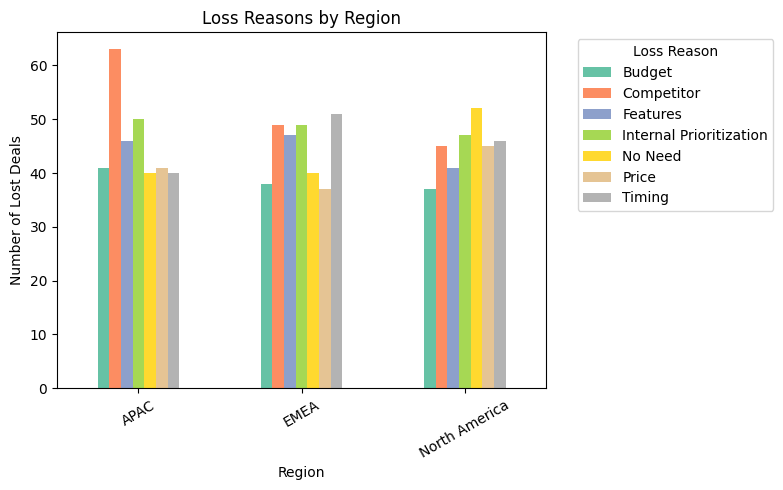

In [111]:
loss_by_region.plot(kind='bar', stacked=False, figsize=(8,5), colormap='Set2')
plt.title('Loss Reasons by Region')
plt.ylabel('Number of Lost Deals')
plt.xticks(rotation=30)
plt.legend(title='Loss Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [112]:
# Normalize the loss reasons within each Region (i.e., for all lost APAC region, what % were lost to Price?)
loss_by_region_norm = deals_lost.groupby('Region')['Loss_Reason'].value_counts(normalize=True).mul(100).unstack()
loss_by_region_norm = loss_by_region_norm.T # Transpose for better visualization

print("Loss Reason Breakdown by Region (% of Lost Deals per Tier):")
loss_by_region_norm.round(2)

Loss Reason Breakdown by Region (% of Lost Deals per Tier):


Region,APAC,EMEA,North America
Loss_Reason,,,
Budget,12.77,12.22,11.82
Competitor,19.63,15.76,14.38
Features,14.33,15.11,13.10
Internal Prioritization,15.58,15.76,15.02
No Need,12.46,12.86,16.61
Price,12.77,11.90,14.38
Timing,12.46,16.40,14.70


_**Obs:**_

- _APAC region suffers most losses due to Competitors --> strong external competition in this region_
- _EMEA region has losses due to Timing and Competitor — process inefficiency or competitor_
- _In North America No Need is the top loss reason --> need to improve lead qualification and value communication_

##### Loss Reason x Sales Rep

In [113]:
loss_by_rep = deals_lost.groupby('Sales_Rep')['Loss_Reason'].value_counts().unstack()

print("Loss Reasons by Sales Representative:")
loss_by_rep

Loss Reasons by Sales Representative:


Loss_Reason,Budget,Competitor,Features,Internal Prioritization,No Need,Price,Timing
Sales_Rep,,,,,,,
Alice Johnson,27,32,29,36,26,28,32
Bob Williams,17,28,20,24,27,18,24
Charlie Brown,23,33,41,31,22,21,23
Diana Miller,22,27,23,29,31,24,32
Eve Davis,27,37,21,26,26,32,26


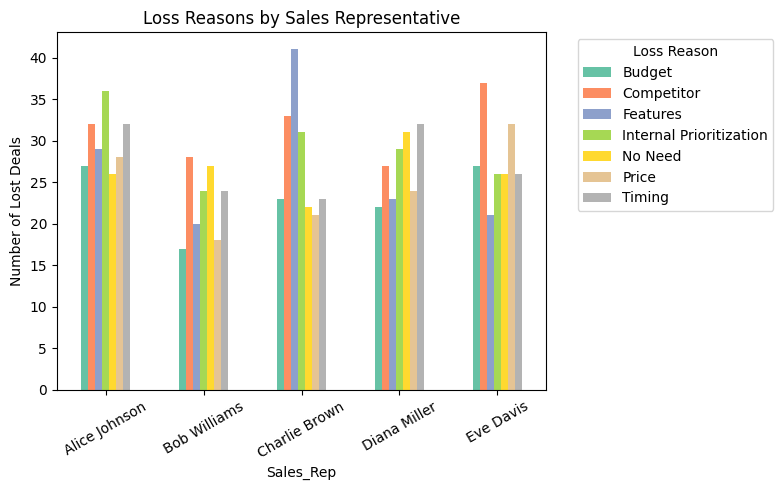

In [114]:
loss_by_rep.plot(kind='bar', stacked=False, figsize=(8,5), colormap='Set2')
plt.title('Loss Reasons by Sales Representative')
plt.ylabel('Number of Lost Deals')
plt.xticks(rotation=30)
plt.legend(title='Loss Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [115]:
# Normalize the loss reasons within each Region (i.e., for all lost APAC region, what % were lost to Price?)
loss_by_rep_norm = deals_lost.groupby('Sales_Rep')['Loss_Reason'].value_counts(normalize=True).mul(100).unstack()
loss_by_rep_norm = loss_by_rep_norm.T # Transpose for better visualization

print("Loss Reason Breakdown by Sales Representative (% of Lost Deals per Tier):")
loss_by_rep_norm.round(2)

Loss Reason Breakdown by Sales Representative (% of Lost Deals per Tier):


Sales_Rep,Alice Johnson,Bob Williams,Charlie Brown,Diana Miller,Eve Davis
Loss_Reason,,,,,
Budget,12.86,10.76,11.86,11.70,13.85
Competitor,15.24,17.72,17.01,14.36,18.97
Features,13.81,12.66,21.13,12.23,10.77
Internal Prioritization,17.14,15.19,15.98,15.43,13.33
No Need,12.38,17.09,11.34,16.49,13.33
Price,13.33,11.39,10.82,12.77,16.41
Timing,15.24,15.19,11.86,17.02,13.33


_**Obs:**_

- _This can be used to target coaching or enablement programs per rep_
- _Losses vary by skill, not just region or product — valuable for performance reviews and training focus_

##### Competitor

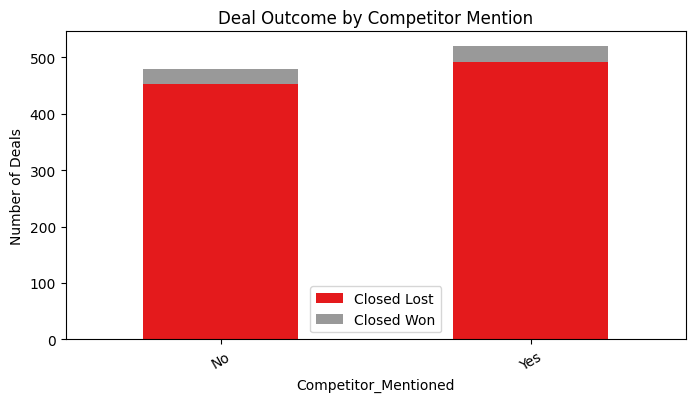

In [116]:
comp_stage_count = data.groupby('Competitor_Mentioned')['Stage'].value_counts().unstack()

comp_stage_count.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Set1')

plt.title('Deal Outcome by Competitor Mention')
plt.ylabel('Number of Deals')
plt.xticks(rotation=30)
plt.legend(loc='best')
plt.show()

In [117]:
competitor_analysis = data.groupby('Competitor_Mentioned').agg(
    Total_Deals=('Opportunity_ID', 'count'),
    Deals_Won= ('Stage', lambda x: (x == 'Closed Won').sum())
)

competitor_analysis['Win_Rate_%'] = ((competitor_analysis['Deals_Won'] / competitor_analysis['Total_Deals']) * 100).round(2)

print("Competitor Analysis:")
competitor_analysis.round(2)

Competitor Analysis:


,Total_Deals,Deals_Won,Win_Rate_%
Competitor_Mentioned,,,
No,480,27,5.62
Yes,520,28,5.38


In [118]:
if 'Yes' in competitor_analysis.index and 'No' in competitor_analysis.index:
    win_rate_with = competitor_analysis.loc['Yes', 'Win_Rate_%']
    win_rate_without = competitor_analysis.loc['No', 'Win_Rate_%']
    impact = win_rate_without - win_rate_with
    
    print(f"Win Rate when competitor mentioned: {win_rate_with:.2f}%")
    print(f"Win Rate when no competitor: {win_rate_without:.2f}%")
    print(f"Impact: {impact:.2f} percentage points lower when competitor is present")


Win Rate when competitor mentioned: 5.38%
Win Rate when no competitor: 5.62%
Impact: 0.24 percentage points lower when competitor is present


_**Obs:**_

- _Competitor involvement slightly increases loss chances_
- _Win rate drops from 5.62% → 5.38% when a competitor is mentioned --> mild but measurable deal friction_
- _Competition presence doesn’t drastically change outcomes_

##### Loss Reason x Competitor Mentioned

In [119]:
# Distribution of Loss Reasons specifically when a competitor IS mentioned
competitor_loss_reasons = deals_lost[deals_lost['Competitor_Mentioned'] == 'Yes']['Loss_Reason'].value_counts(normalize=True).mul(100).round(1)

# 3. Create a comparison DataFrame for presentation
competitor_loss = pd.DataFrame({
    'Overall_Loss_%': loss_reasons['Loss%'],
    'Comp_Mentioned_Loss_%': competitor_loss_reasons
}).round(2).sort_values('Overall_Loss_%', ascending=False)

print("Loss Reason Comparison (Overall vs. Competitor Mentioned):")
competitor_loss

Loss Reason Comparison (Overall vs. Competitor Mentioned):


,Overall_Loss_%,Comp_Mentioned_Loss_%
Loss_Reason,,
Competitor,16.61,16.9
Internal Prioritization,15.45,15.9
Timing,14.50,14.2
Features,14.18,14.4
No Need,13.97,14.8
Price,13.02,11.8
Budget,12.28,12.0


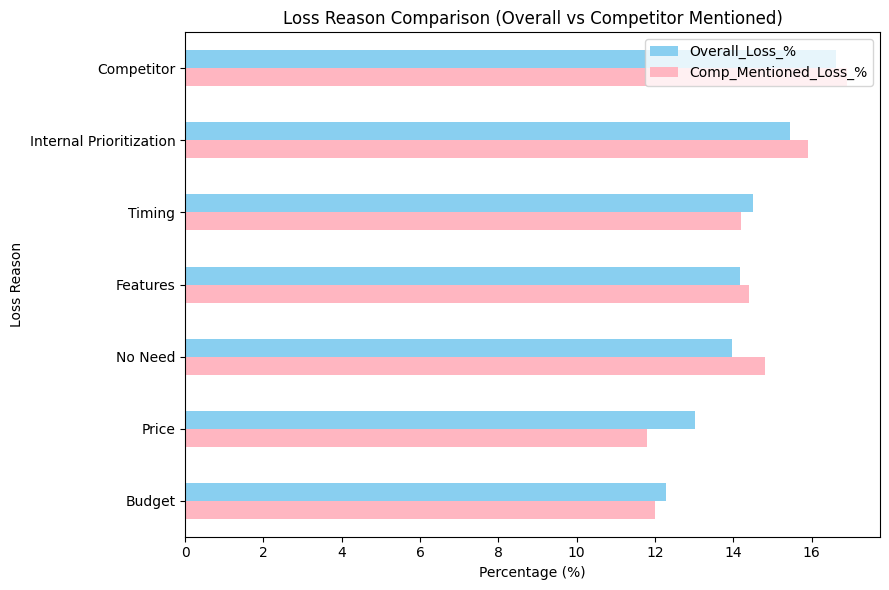

In [120]:
competitor_loss_reset = competitor_loss.reset_index().rename(columns={'index':'Loss_Reason'})

competitor_loss_reset.plot(x='Loss_Reason', kind='barh', color=['#89CFF0', '#FFB6C1'], figsize=(9,6))
plt.title('Loss Reason Comparison (Overall vs Competitor Mentioned)')
plt.xlabel('Percentage (%)')
plt.ylabel('Loss Reason')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


_**Obs:**_

- _Top loss reasons — Competitor (16.9%), Internal Prioritization (15.9%), and Timing (14.2%)_
- _Slight rise in “No Need” (+0.8%) and “Features” (+0.2%) when competitors are mentioned_
- _“Price” losses drop (–1.2%) with competitors present --> pricing is not the main issue in competitive deals_

#### Trend & Time

##### Pipeline / Lead Flow 

Monthly deal count

In [121]:
monthly_deals = data.groupby('Month_Created')['Opportunity_ID'].count().sort_index()
monthly_deals

Month_Created
2024-06    84
2024-07    89
2024-08    86
2024-09    75
2024-10    90
2024-11    75
2024-12    81
2025-01    83
2025-02    83
2025-03    88
2025-04    79
2025-05    87
Freq: M, Name: Opportunity_ID, dtype: int64

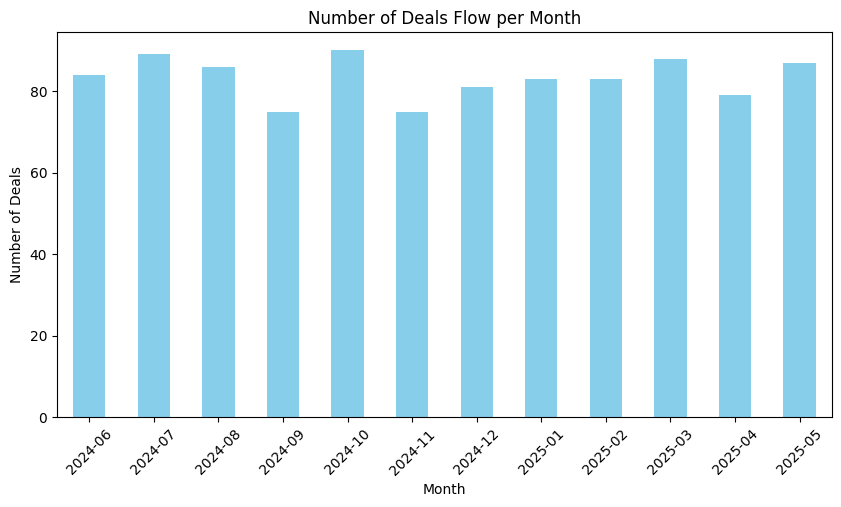

In [122]:
monthly_deals.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Number of Deals Flow per Month")
plt.xlabel("Month")
plt.ylabel("Number of Deals")
plt.xticks(rotation=45)
plt.show()

Quarterly deal count

In [123]:
quarterly_deals = data.groupby('Quarter_Created')['Opportunity_ID'].count().sort_index()

quarterly_deals

Quarter_Created
2024Q2     84
2024Q3    250
2024Q4    246
2025Q1    254
2025Q2    166
Freq: Q-DEC, Name: Opportunity_ID, dtype: int64

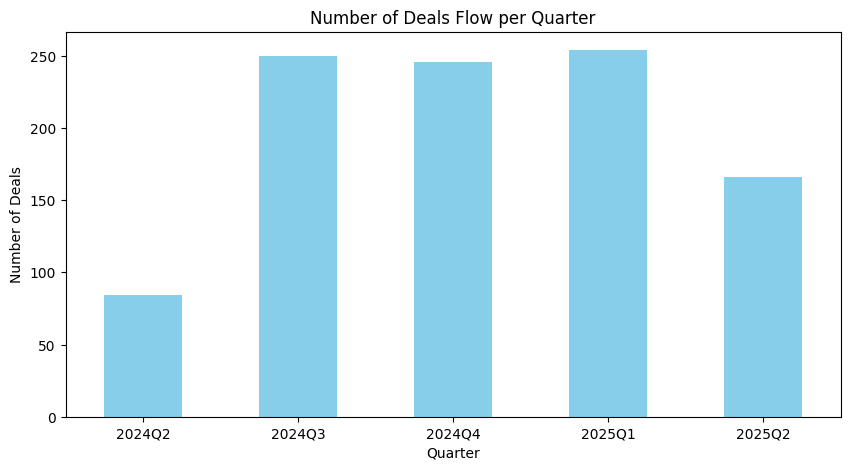

In [124]:
quarterly_deals.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Number of Deals Flow per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of Deals")
plt.xticks(rotation=0)
plt.show()

In [125]:
cohort_analysis = data.groupby('Quarter_Created').agg(
    Total_Opps=('Opportunity_ID', 'count'),
    Deals_Won=('Stage', lambda x: (x == 'Closed Won').sum())
).sort_values('Quarter_Created')

cohort_analysis['Total_Won_Revenue'] = deals_won.groupby('Quarter_Created')['Amount_USD'].sum()
cohort_analysis['Avg_Cycle_Days'] = deals_won.groupby('Quarter_Created')['Sales_Cycle_Days'].mean()
cohort_analysis['Win_Rate_%'] = (cohort_analysis['Deals_Won'] / cohort_analysis['Total_Opps'] * 100).round(1)

cohort_analysis.round(2)

,Total_Opps,Deals_Won,Total_Won_Revenue,Avg_Cycle_Days,Win_Rate_%
Quarter_Created,,,,,
2024Q2,84,3,7337.12,154.33,3.6
2024Q3,250,18,117853.18,142.44,7.2
2024Q4,246,14,77854.18,133.36,5.7
2025Q1,254,12,47469.03,122.17,4.7
2025Q2,166,8,31787.30,130.50,4.8


_**Obs:**_

- _Q32024 with 250 opportunities, $117853 revenue and 7.2% Win Rate is the highest of all quarters_
- _Sales cycles shortened over time, from ~154 days in Q2 2024 to ~122 days by Q1 2025 --> process efficiency_
- _Both volume and win rate dropped slightly in 2025_

Number of Deals Closed per Month

In [126]:
monthly_count = data.groupby(['Month_Closed', 'Stage'])['Opportunity_ID'].count().unstack().fillna(0)

monthly_count

Stage,Closed Lost,Closed Won
Month_Closed,,
2024-07,12.0,0.0
2024-08,32.0,0.0
2024-09,42.0,1.0
2024-10,80.0,2.0
2024-11,56.0,8.0
2024-12,83.0,3.0
2025-01,86.0,5.0
2025-02,71.0,4.0
2025-03,68.0,2.0


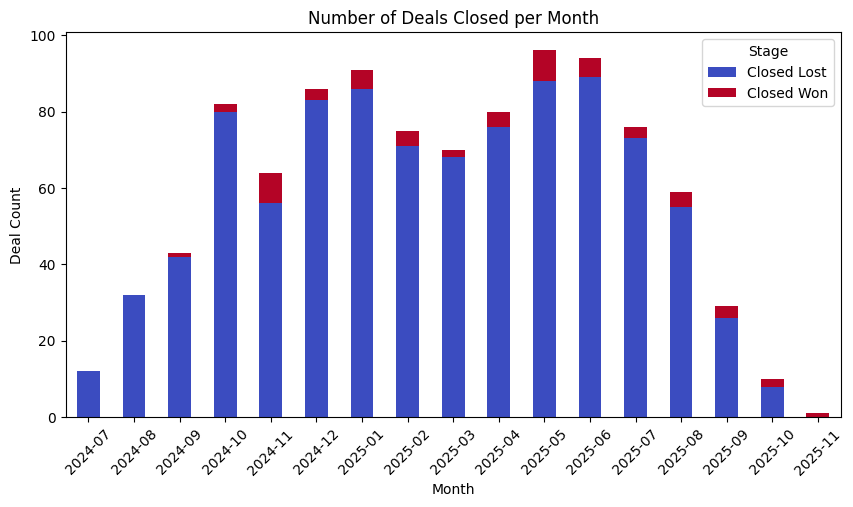

In [127]:
monthly_count.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title('Number of Deals Closed per Month')
plt.xlabel('Month')
plt.ylabel('Deal Count')
plt.xticks(rotation=45)
plt.show()

Number of Deals Closed per Quarter

In [128]:
quarterly_count = data.groupby(['Quarter_Closed', 'Stage'])['Opportunity_ID'].count().unstack().fillna(0)

quarterly_count

Stage,Closed Lost,Closed Won
Quarter_Closed,,
2024Q3,86,1
2024Q4,219,13
2025Q1,225,11
2025Q2,253,17
2025Q3,154,10
2025Q4,8,3


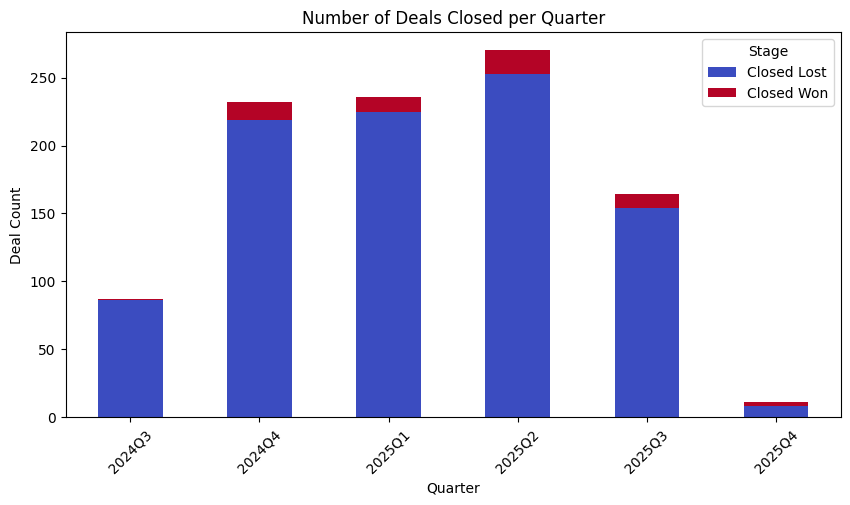

In [129]:
quarterly_count.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title('Number of Deals Closed per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Deal Count')
plt.xticks(rotation=45)
plt.show()

_**Obs:**_

- _Q2 2025 with 17 deals closed is the strongest quarter_
- _2024Q4 marked the first significant improvement, from 1 deal in Q3 2024 to 13 deals closed_

Pipeline Build-up vs Revenue Realization

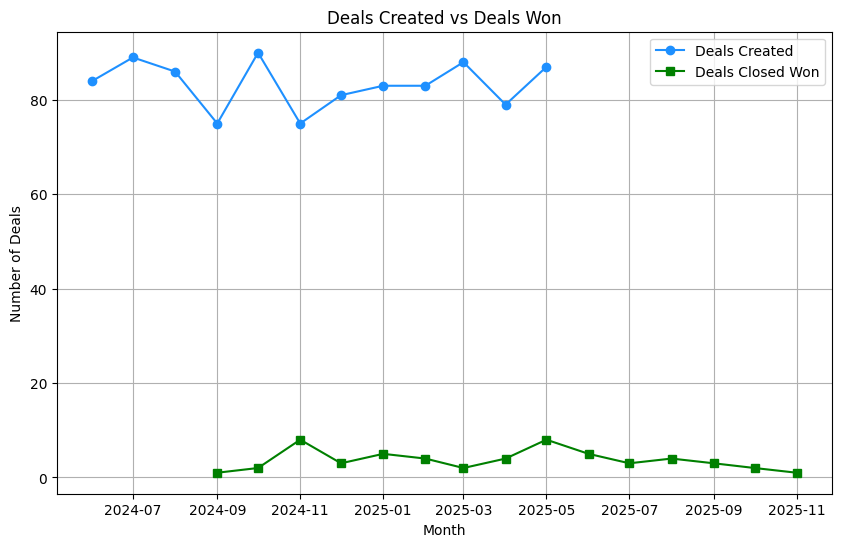

In [130]:
# Align both to same index (month)
created_trend = monthly_deals
closed_trend = deals_won.groupby('Month_Closed')['Opportunity_ID'].count()

# Convert PeriodIndex → Timestamp
created_trend.index = created_trend.index.to_timestamp()
closed_trend.index = closed_trend.index.to_timestamp()

# Plot
plt.figure(figsize=(10,6))
plt.plot(created_trend, marker='o', label='Deals Created', color='dodgerblue')
plt.plot(closed_trend, marker='s', label='Deals Closed Won', color='green')
plt.title("Deals Created vs Deals Won")
plt.xlabel("Month")
plt.ylabel("Number of Deals")
plt.legend()
plt.grid(True)
plt.show()


_**Obs:**_

- _Strong pipeline creation across all months (avg ~84 new opportunities/month), but conversion remains low (~5–7%)_
- _Most deals in July 2024, October 2024, March 2025, and May 2025 --> strong lead?_
- _Win Lags ~1-2 months --> Deals created mid-quarter typically close in the following quarter_

##### Revenue / Deal Value

Monthly Deal Value (Closed Won only)

In [131]:
monthly_revenue = deals_won.groupby('Month_Closed')['Amount_USD'].sum()

monthly_revenue

Month_Closed
2024-09     1846.39
2024-10    12597.73
2024-11    65242.53
2024-12    12684.88
2025-01    23476.95
2025-02    15576.31
2025-03     6996.97
2025-04    12625.80
2025-05    57371.18
2025-06    26645.18
2025-07    14790.83
2025-08     9848.36
2025-09     7939.52
2025-10     9938.78
2025-11     4719.40
Freq: M, Name: Amount_USD, dtype: float64

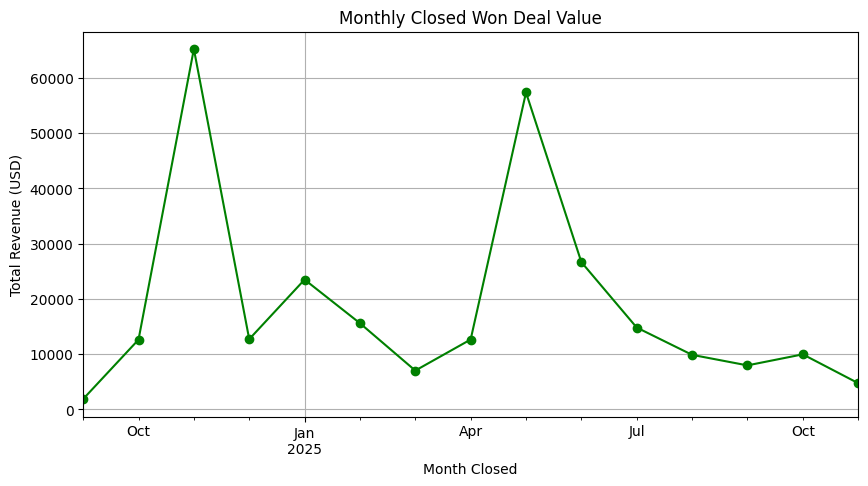

In [132]:
plt.figure(figsize=(10, 5))
monthly_revenue.plot(marker='o', color='green')
plt.title('Monthly Closed Won Deal Value')
plt.xlabel('Month Closed')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.show()

Quarterly revenue 

In [133]:
quarterly_revenue = deals_won.groupby('Quarter_Closed')['Amount_USD'].sum().sort_index()

quarterly_revenue

Quarter_Closed
2024Q3     1846.39
2024Q4    90525.14
2025Q1    46050.23
2025Q2    96642.16
2025Q3    32578.71
2025Q4    14658.18
Freq: Q-DEC, Name: Amount_USD, dtype: float64

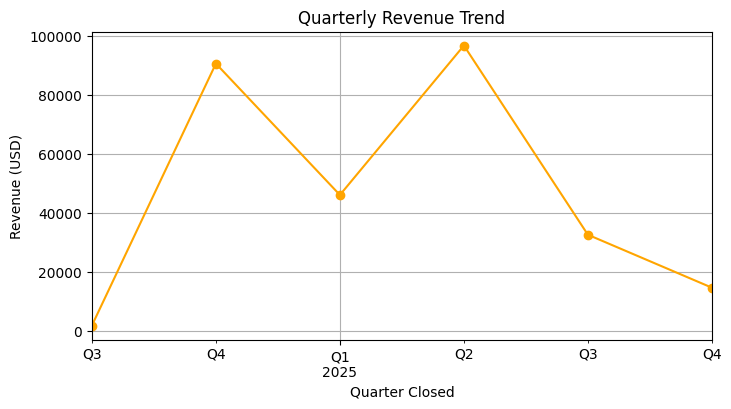

In [134]:
quarterly_revenue.plot(marker='o', figsize=(8,4), color='orange')
plt.title("Quarterly Revenue Trend")
plt.xlabel("Quarter Closed")
plt.ylabel("Revenue (USD)")
plt.grid(True)
plt.show()

_**Obs:**_

- _Revenue peaks in `November` 2024 ($65K) and `May` 2025 ($57K)_
- _September 2024 and March 2025 have the lowest revenue_
- _Q2 2025 has highest revenue and Q3–Q4 2025 has lowest_
- _Revenue performance is cyclical but does not have steady growth_

##### Conversion or Velocity Studies

Focus on Sales Cycle Duration and Win Rate over time

Win Rate per Month

In [135]:
monthly_win_rate = data.groupby('Month_Closed')['Stage'].apply(lambda x: (x == 'Closed Won').mean() * 100).round(1)

monthly_win_rate

Month_Closed
2024-07      0.0
2024-08      0.0
2024-09      2.3
2024-10      2.4
2024-11     12.5
2024-12      3.5
2025-01      5.5
2025-02      5.3
2025-03      2.9
2025-04      5.0
2025-05      8.3
2025-06      5.3
2025-07      3.9
2025-08      6.8
2025-09     10.3
2025-10     20.0
2025-11    100.0
Freq: M, Name: Stage, dtype: float64

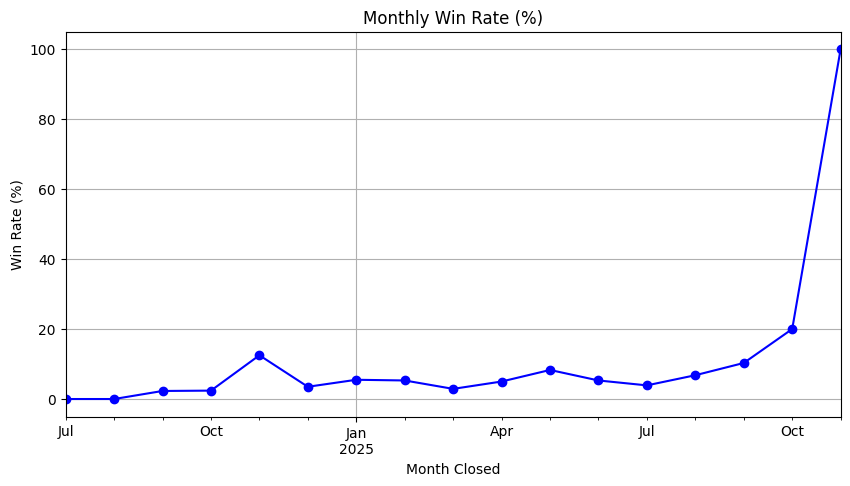

In [136]:
plt.figure(figsize=(10, 5))
monthly_win_rate.plot(marker='o', color='blue')
plt.title('Monthly Win Rate (%)')
plt.xlabel('Month Closed')
plt.ylabel('Win Rate (%)')
plt.grid(True)
plt.show()

Average Sales Cycle by Month

In [137]:
avg_cycle = deals_won.groupby('Month_Closed')['Sales_Cycle_Days'].median().round(2)

avg_cycle

Month_Closed
2024-09    117.0
2024-10     82.0
2024-11    119.5
2024-12    167.0
2025-01     73.0
2025-02    151.0
2025-03    159.0
2025-04    160.5
2025-05    123.5
2025-06    171.0
2025-07    127.0
2025-08    110.5
2025-09    165.0
2025-10    169.0
2025-11    183.0
Freq: M, Name: Sales_Cycle_Days, dtype: float64

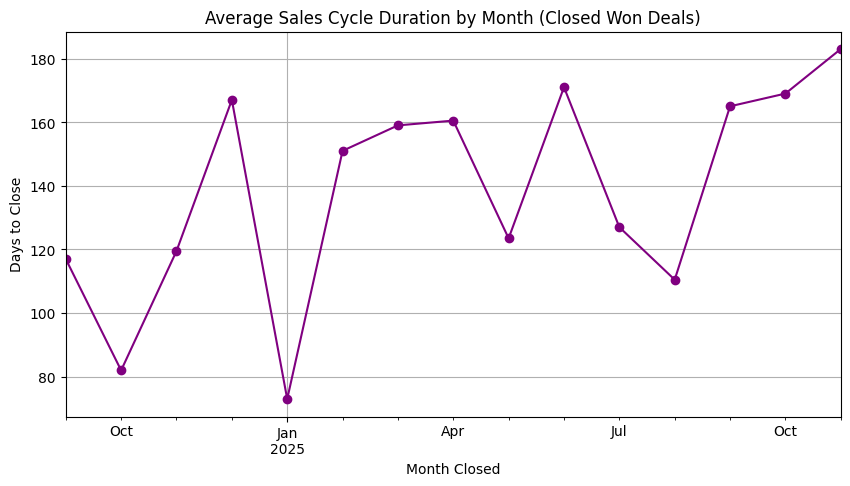

In [138]:
plt.figure(figsize=(10,5))
avg_cycle.plot(marker='o', color='purple')
plt.title('Average Sales Cycle Duration by Month (Closed Won Deals)')
plt.xlabel('Month Closed')
plt.ylabel('Days to Close')
plt.grid(True)
plt.show()

_**Obs:**_

- _`November` has the highest revenue ($65,243) as well as highest win rate(100%)_
- _Overall average win rate is ~11.4%_
- _Gradual improvement in win rate through 2025, despite increasing sales cycle duration in later months_
- _Long sales cycles (150–180 days) do not always reduce win probability —-> strong pipeline or better lead_

##### Seasonality Analysis

In [139]:
data['Month_Name'] = pd.to_datetime(data['Close_Date']).dt.month_name()

monthly_seasonality = data.groupby('Month_Name').agg(
    Total_Deals= ('Opportunity_ID', 'count'),
    Won_Deals=('Stage', lambda x: (x == 'Closed Won').sum()),
    Revenue_USD=('Amount_USD', lambda x: x[data.loc[x.index, 'Stage'] == 'Closed Won'].sum())
)

# Reorder by calendar month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_seasonality = monthly_seasonality.reindex([m for m in month_order if m in monthly_seasonality.index])

print("Deals Closed by Month:")
monthly_seasonality

Deals Closed by Month:


,Total_Deals,Won_Deals,Revenue_USD
Month_Name,,,
January,91,5,23476.95
February,75,4,15576.31
March,70,2,6996.97
April,80,4,12625.80
May,96,8,57371.18
June,94,5,26645.18
July,88,3,14790.83
August,91,4,9848.36
September,72,4,9785.91


In [140]:
print(f"Best Month: {monthly_seasonality['Revenue_USD'].idxmax()} (${monthly_seasonality['Revenue_USD'].max():,.0f})")
print(f"Weakest Month: {monthly_seasonality['Revenue_USD'].idxmin()} (${monthly_seasonality['Revenue_USD'].min():,.0f})")

Best Month: November ($69,962)
Weakest Month: March ($6,997)


_**Obs:**_

- _`November` has the highest revenue (**$69.9K**) and strongest conversion efficiency (9 wins from 65 deals)_
- _`March` has the lowest revenue (**$7K**) and minimal deal success_
- _Revenue does not strictly follow total deal count --> deal quality and average deal size vary significantly month to month_
- _Post–Q2 performance (May–Nov) shows a clear recovery trend in both win rate and deal value --> stronger pipeline quality_

#### Forecasting (Basic Statistical Analysis)

The data covers the past 12+ months (from July 2024 to Oct 2025/Nov 2025), a simple, justified methodology is a Historical Average Approach.

Assuming the historical period is roughly the last 4 quarters (Q3 2024 - Q4 2025), use the quarterly average of Closed Won revenue and deals.

Forecast Methodology:

- Group the data by Quarter Closed.
- Calculate the Total Won Revenue and Count of Won Deals for each quarter.
- Calculate the Average Quarter's Won Revenue and Deals (Historical Average).
- Forecast for the next quarter using this average.

In [141]:
quarterly_performance = deals_won.groupby('Quarter_Closed').agg(
    Deals_Won=('Opportunity_ID', 'count'),
    Total_Revenue_USD=('Amount_USD', 'sum')
)

print("Historical Quarterly Closed Won Performance:")
quarterly_performance

Historical Quarterly Closed Won Performance:


,Deals_Won,Total_Revenue_USD
Quarter_Closed,,
2024Q3,1,1846.39
2024Q4,13,90525.14
2025Q1,11,46050.23
2025Q2,17,96642.16
2025Q3,10,32578.71
2025Q4,3,14658.18


In [142]:
quarterly_performance['Deals_Forecast'] = quarterly_performance['Deals_Won'].rolling(window=3).mean().round(0)
quarterly_performance['Revenue_Forecast'] = quarterly_performance['Total_Revenue_USD'].rolling(window=3).mean().round(2)

expected_deals = quarterly_performance['Deals_Forecast'].iloc[-1]
expected_revenue = quarterly_performance['Revenue_Forecast'].iloc[-1]

print("Next Quarter Forecast (Historical Average Method)\n")

print(f"Expected Closed Won Deals (Next Quarter): {expected_deals}")
print(f"Expected Revenue (Next Quarter): ${expected_revenue}")

Next Quarter Forecast (Historical Average Method)

Expected Closed Won Deals (Next Quarter): 10.0
Expected Revenue (Next Quarter): $47959.68


##### Why this Forecasting Methodology?

- A simple 3-period moving average was used to estimate next quarter’s expected revenue and closed deals.
- This method smooths out short-term volatility while capturing the overall trend from recent quarters.
- It’s appropriate for this dataset because quarterly sales typically show gradual trends rather than abrupt changes, and the available historical data points are limited.

##### Forecast Limitations

1. This simple average does not consider seasonality or month-to-month trends.

2. There's no open pipeline so it misses current open pipeline value and stage transition factors.

3. There's no consider for market changes, competitions, resources etc; it assumes past trends will remain unchanged.

4. The historical data spans only few quarters and with more data a regression model may have better accuracy.

5. It's sensitive to outliers.

### Summary & Key Insights

In [143]:
# Collect metrics in a flat dictionary
metrics = {
    'Total_Pipeline_Value': pipeline_value,
    'Total_Deals': len(data),
    'Open_Opportunities': open_deals,
    'Closed_Deals': len(closed_deals),
    'Closed_Won': len(deals_won),
    'Closed_Lost': len(deals_lost),
    'Overall_Win_Rate%': win_rate,
    'Average_Sales_Cycle_Days': avg_cycle_all,
    'Total_Deals': len(data),
    'Best_Rep': rep_performance['Win_Rate_%'].idxmax(),
    'Best_Rep_WinRate%': rep_performance['Win_Rate_%'].max().round(2),
    'Best_Region': region_performance['Win_Rate_%'].idxmax(),
    'Best_Region_WinRate%': region_performance['Win_Rate_%'].max().round(2),
    'Best_Product': prod_performance['Win_Rate_%'].idxmax(),
    'Best_Product_WinRate%': prod_performance['Win_Rate_%'].max().round(2),
    'Best_Lead_Source': lead_performance['Win_Rate_%'].idxmax(),
    'Best_Lead_WinRate%': lead_performance['Win_Rate_%'].max().round(2),
    'Best_Month': monthly_seasonality['Revenue_USD'].idxmax(),
    'Best_Month_Revenue': monthly_seasonality['Revenue_USD'].max(),
    'Most_Common_Loss_Reason': loss_reasons.sort_values('Loss%', ascending=False).index[0],
    'Competitor_Impact_pp': impact,
    'Forecasted_Revenue_Next_Q': expected_revenue,
    'Forecasted_Deals_Next_Q': expected_deals
}

# Convert to DataFrame (1 row, many columns)
metrics_df = pd.DataFrame([metrics])

print("Key Metrics:")
metrics_df.T

Key Metrics:


,0
Total_Pipeline_Value,5476852.91
Total_Deals,1000
Open_Opportunities,0
Closed_Deals,1000
Closed_Won,55
Closed_Lost,945
Overall_Win_Rate%,5.5
Average_Sales_Cycle_Days,93.0
Best_Rep,Alice Johnson
Best_Rep_WinRate%,6.67


#### Key Summary Insights


* The total pipeline value stands at **$5.48M** across **1,000 deals**, reflecting a strong inflow of opportunities.

* The **5.5% Win Rate**, indicates moderate conversion efficiency with room for improvement through better qualification and follow-up.

* The **average sales cycle of 93 days**, suggests a moderately long buying process — faster cycles tend to correlate with higher win rates.

* **Alice Johnson** is the top-performing sales rep with a **6.67% Win Rate**, while **North America** leads all regions with **5.72%**.

* The **‘Pro’ product tier** have the highest Win Rate of **7.44%**, signaling high market fit and interest.

* **Partner leads** generate the best results with a **7.6% Win Rate**, emphasizing the importance of channel-driven acquisition.

* **November** stands out as the **best-performing month** with ~$69.96K in revenue, while **March** was the weakest (~$7K).

* Performance peaked in **Q4 2024 and Q2 2025**, both in deal volume and revenue, followed by moderate stability in later months.

* **Win rates fluctuated** month-to-month — rising sharply in late 2025 — highlighting inconsistent deal closure trends.

* The most common **loss reason is “Budget”**, suggesting challenges with pricing perception or value communication.

* Other frequent loss factors — **Internal Prioritization** and **Timing** — point to missed alignment with buyer readiness.

* **Competitor presence** had a **minor negative impact** (−0.24 percentage points on win rate), indicating manageable competitive pressure.

* The **forecast for next quarter** projects ~$47.96K in potential revenue from around 10 expected deals, based on recent performance trends.



#### Takeaways

* Focus on mitigating budget-related losses through flexible pricing or better ROI communication.
* Shorten the sales cycle by improving follow-ups and streamlining approval stages.
* Leverage high-performing sources (Partner leads) and products (Pro tier) for scalable growth.
* Use insights from top performers and regions to replicate success across the team.

Hence, shift focus toward:
  * Reducing budget-related losses
  * Shortening sales cycles
  * Leveraging top-performing products and lead channels
  * Maintaining consistency in monthly win rates

## Data Storytelling

### Dashboard

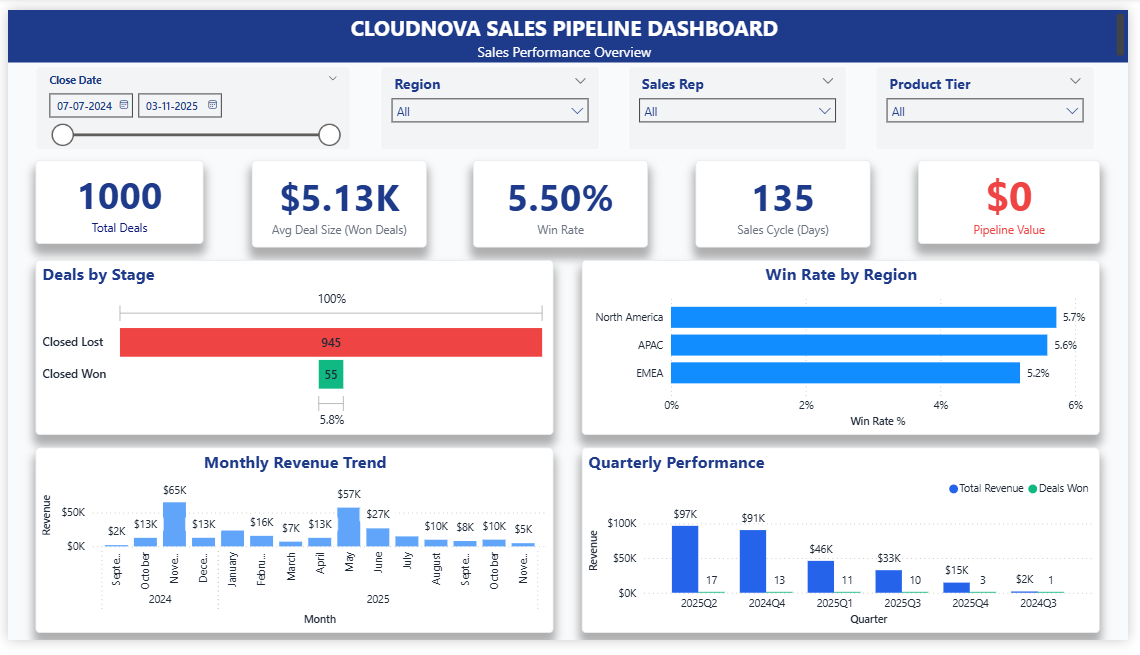

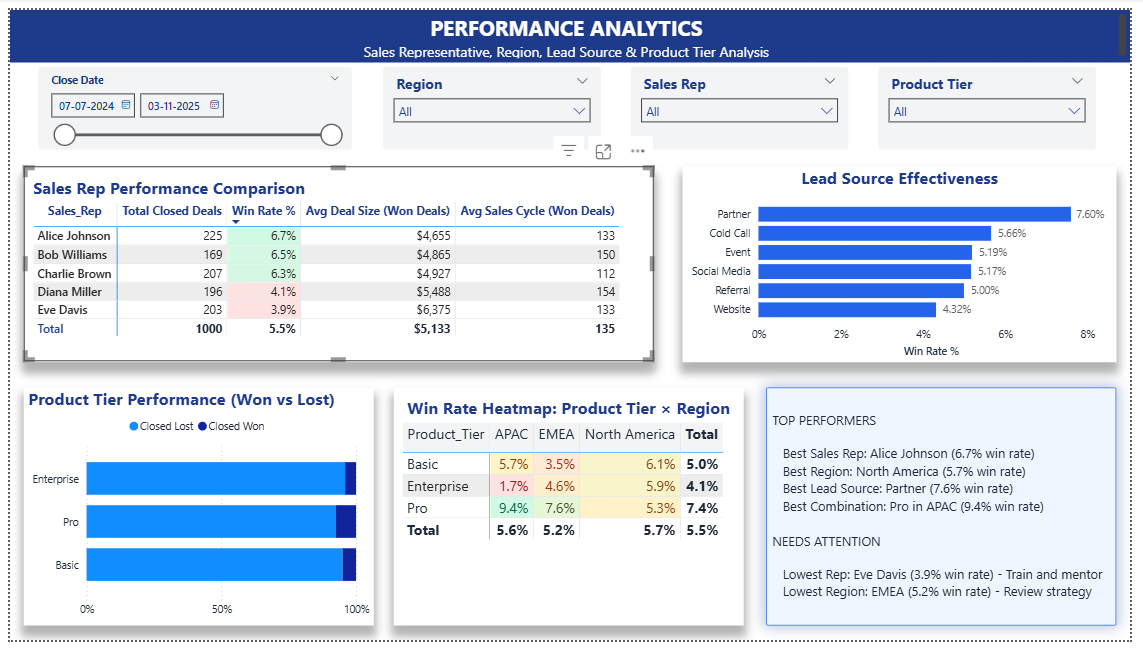

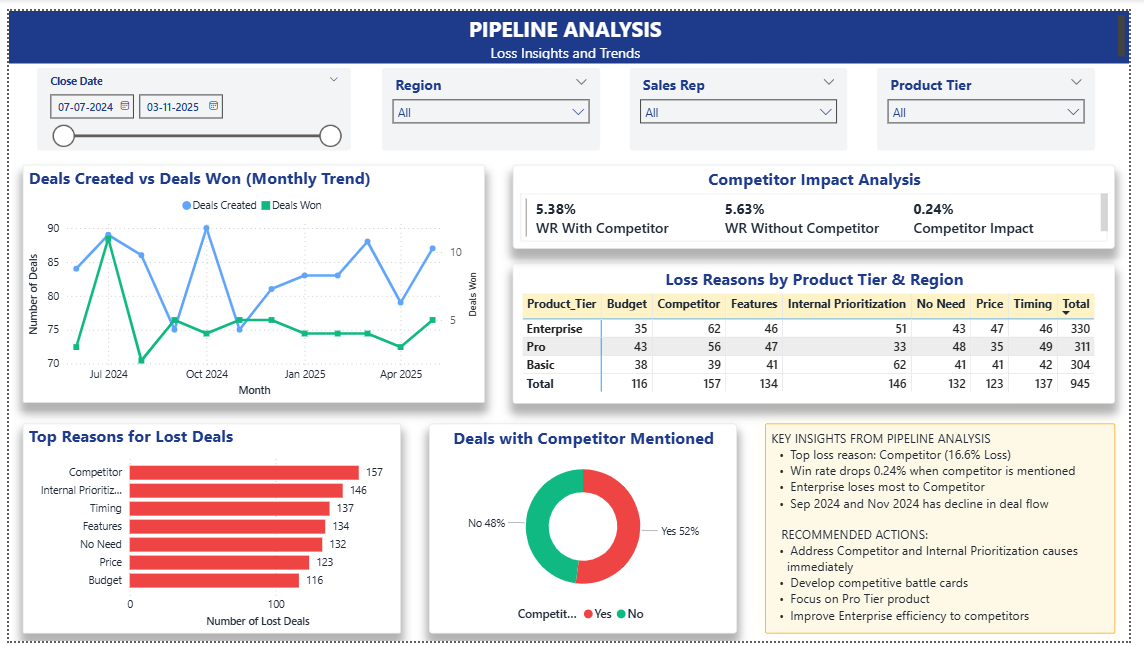

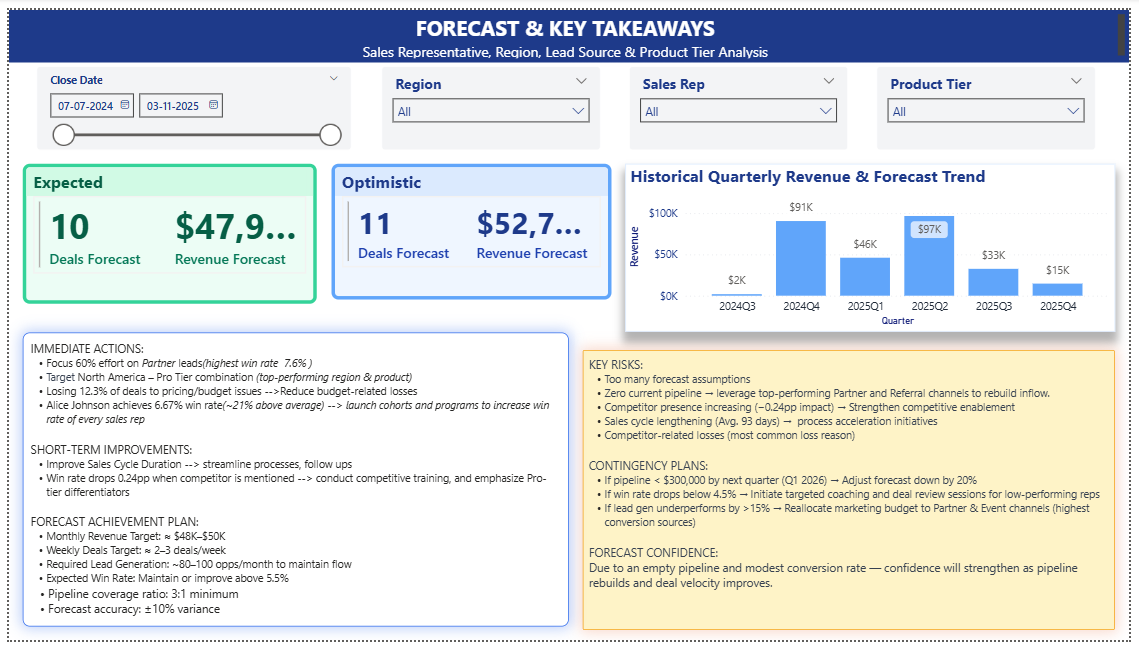